Aqui realizo a importação de bibliotecas essenciais para a manipulação de dados

In [285]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Aqui realizo a importação da tabela

In [286]:
tabela = "Drugs.csv"
data = pd.read_csv(tabela)
print(data.head(3))

   ID    Age Gender                          Education Country Ethnicity  \
0   2  25-34      M                   Doctorate degree      UK     White   
1   3  35-44      M  Professional certificate/ diploma      UK     White   
2   4  18-24      F                     Masters degree      UK     White   

   Income (USD)   Nscore   Escore   Oscore  ...  Ecstasy  Heroin Ketamine  \
0           NaN -0.67825  1.93886  1.43533  ...      CL4     CL0      CL2   
1           NaN -0.46725  0.80523 -0.84732  ...      CL0     CL0      CL0   
2           NaN -0.14882 -0.80615 -0.01928  ...      CL0     CL0      CL2   

   Legalh  LSD Meth Mushrooms Nicotine Semer  VSA  
0     CL0  CL2  CL3       CL0      CL4   CL0  CL0  
1     CL0  CL0  CL0       CL1      CL0   CL0  CL0  
2     CL0  CL0  CL0       CL0      CL2   CL0  CL0  

[3 rows x 33 columns]


Dicionário das Variáveis

1. ID: é um número de registros em um banco de dados original.
Não pode ser relacionado ao participante. Pode ser usado apenas
como referência.
2. Age (Real): é a idade do participante.
3. Gender: Masculino ou Feminino.
4. Education: nível de educação do participante.
5. Country: país de origem do participante.
6. Ethnicity: etnia do participante.
7. Income (USD): renda mensal em dólares.
8.
Nscore (Real): é o Neuroticismo da NEO-FFI-R.
9. Escore (Real): é a Extraversão da NEO-FFI-R.
10. Oscore (Real): é a Abertura à Experiência da NEO-FFI-R.
11. AScore (Real): é a Amabilidade da NEO-FFI-R.
12. Cscore (Real): é a Conscienciosidade da NEO-FFI-R.13. Impulsive (Real): é impulsividade medida pelo BIS-11.
14. SS (Real): é percepção sensorial medida pela ImpSS.
15. Alcohol: consumo de álcool.
16. Amphet: consumo de anfetaminas.
17. Amyl: consumo de nitritos (poppers).
18. Benzos: consumo de benzodiazepínicos.
19. Caff: consumo de cafeína.
20. Cannabis: consumo de maconha.
21. Choc: consumo de chocolate.
22. Coke: consumo de cocaína.
23. Crack: consumo de crack.
24. Ecstasy: consumo de êxtase.
25. Heroin: consumo de heroína.
26. Ketamine: consumo de quetamina.
27. Legalh: consumo de altos legais.
28. LSD: consumo de LSD.
29. Meth: consumo de metadona.
30. Mushrooms: consumo de cogumelos mágicos.
31. Nicotine: consumo de nicotina.
32. Semer: classe de consumo fictício de droga Semeron (ou seja,
controle).
33. VSA: classe de consumo de abuso de substâncias voláteis.

Classificações de Uso de Drogas:
- CL0 Nunca Usou
- CL1 Usou Mais de Uma Década Atrás
- CL2 Usou nos Últimos Dez Anos
- CL3 Usou no Último Ano (59 vezes)
- CL4 Usou nos Últimos Meses
- CL5 Usou na Última Semana
- CL6 Usou Hoje

1. No dataset existem alguns valores faltantes. Antes de começar a
manipular os dados, trate essas informações e descreva sucintamente as
alterações feitas;

In [287]:
print("pré manipulação linhas, colunhas", data.shape)

# aqui estão sendo calculados todos os valores no qual são nulos e sendo inseridos em uma tabela
table_null = data.isnull().sum()
print(table_null[table_null > 0])
#print(table_null.head)
#aqui utilizamos um método do pandas chamado dropna, que remove todos os valores nulos 

data_cleaned = data.dropna()  # Remove linhas com nan
data_cleaned = data_cleaned.dropna(axis=1)  # Remove colunas com nan

print(table_null[table_null > 0])
print("em manipulação pós dropna linhas, colunhas", data.shape)

pré manipulação linhas, colunhas (1884, 33)
Gender             4
Education          3
Country            1
Ethnicity          2
Income (USD)    1861
Nscore             4
Escore             3
Oscore             3
AScore             4
Cscore             5
Impulsive          3
SS                 7
Alcohol            3
Amphet             2
Amyl               2
Benzos             2
Caff               4
Cannabis           1
Choc               2
Coke               1
Crack              1
dtype: int64
Gender             4
Education          3
Country            1
Ethnicity          2
Income (USD)    1861
Nscore             4
Escore             3
Oscore             3
AScore             4
Cscore             5
Impulsive          3
SS                 7
Alcohol            3
Amphet             2
Amyl               2
Benzos             2
Caff               4
Cannabis           1
Choc               2
Coke               1
Crack              1
dtype: int64
em manipulação pós dropna linhas, colunhas (1884

In [288]:
income_nulls = data['Income (USD)'].isnull().sum()
unico = data['Income (USD)'].unique()

print(f"Nulos em Income: {income_nulls}")
print(f"Valores unicos em Income: {unico}")

Nulos em Income: 1861
Valores unicos em Income: [  nan 1000.]


Assim, não acho saudável substituir todos os valores por apenas 1000 ou apenas tirar a média, então vou fazer um knn pra ver se existe alguma correlação, como estamos usando knn o algoritmo também vai preencher outras coisas conforme o que ele identificar 

In [289]:
#para realizar knn nós precisamos 
#quero que leve em consideração o país e o range de idade, categorizando em códigos  

copia_tabela = data.copy()

copia_tabela['Country'] = data['Country'].astype('category').cat.codes
copia_tabela['Age'] = data['Age'].astype('category').cat.codes

#seleciona colunas de valores númericos, tirando id e considerando país e range de idade
colunas_knn = data.select_dtypes(include=['float64', 'int64']).columns.drop('ID')
colunas_knn = colunas_knn.union(['Country', 'Age'])

print(colunas_knn)

#imputa valores ausentes nas colunas selecionadas usando KNN com 5 vizinhos.
knn_imputer = KNNImputer(n_neighbors=5)
copia_tabela[colunas_knn] = knn_imputer.fit_transform(copia_tabela[colunas_knn])

#salva a tabela
copia_tabela.to_csv('Drugs2.csv', index=False)

Index(['AScore', 'Age', 'Country', 'Cscore', 'Escore', 'Income (USD)',
       'Nscore', 'Oscore', 'SS'],
      dtype='object')


In [290]:
income_nulls = copia_tabela['Income (USD)'].isnull().sum()
unico = copia_tabela['Income (USD)'].unique()

print(f"Nulos em Income: {income_nulls}")
print(f"Valores unicos em Income: {unico}")

table_null = copia_tabela.isnull().sum()
print(table_null[table_null > 0])

table_null = copia_tabela.isnull().sum()
colunas_com_valores_ausentes = table_null[table_null > 0].index.tolist()
print(colunas_com_valores_ausentes)

Nulos em Income: 0
Valores unicos em Income: [1000.]
Gender       4
Education    3
Ethnicity    2
Impulsive    3
Alcohol      3
Amphet       2
Amyl         2
Benzos       2
Caff         4
Cannabis     1
Choc         2
Coke         1
Crack        1
dtype: int64
['Gender', 'Education', 'Ethnicity', 'Impulsive', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack']


Agora vamos arrumar os outros

In [291]:
def transforma_cl(valor):
    dicionario_valores = {'CL0': 1, 'CL1': 2, 'CL2': 3, 'CL3': 4, 'CL4': 5, 'CL5': 6, 'CL6': 7}
    return valor.map(dicionario_valores)
    
#coloco aqui começando em 1, pois ao considerar como começando em 0 pode ocorrer de 0 ser false para alguns algoritmos

drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis','Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for col in drug_columns:
    if col in copia_tabela.columns:
        copia_tabela[col] = transforma_cl(copia_tabela[col])

print(copia_tabela.head(3))

   ID  Age Gender                          Education  Country Ethnicity  \
0   2  1.0      M                   Doctorate degree      6.0     White   
1   3  2.0      M  Professional certificate/ diploma      6.0     White   
2   4  0.0      F                     Masters degree      6.0     White   

   Income (USD)   Nscore   Escore   Oscore  ...  Ecstasy  Heroin Ketamine  \
0        1000.0 -0.67825  1.93886  1.43533  ...        5       1        3   
1        1000.0 -0.46725  0.80523 -0.84732  ...        1       1        1   
2        1000.0 -0.14882 -0.80615 -0.01928  ...        1       1        3   

   Legalh  LSD  Meth  Mushrooms  Nicotine  Semer  VSA  
0       1    3     4          1         5      1    1  
1       1    1     1          2         1      1    1  
2       1    1     1          1         3      1    1  

[3 rows x 33 columns]


In [292]:
cols_faltando = ['Gender', 'Education', 'Country', 'Ethnicity']

for col in cols_faltando:
    if col in copia_tabela.select_dtypes(include=['object']).columns:
        copia_tabela[col] = copia_tabela[col].astype('category').cat.codes

print(copia_tabela.head(3))

   ID  Age  Gender  Education  Country  Ethnicity  Income (USD)   Nscore  \
0   2  1.0       1          0      6.0          6        1000.0 -0.67825   
1   3  2.0       1          7      6.0          6        1000.0 -0.46725   
2   4  0.0       0          6      6.0          6        1000.0 -0.14882   

    Escore   Oscore  ...  Ecstasy  Heroin Ketamine  Legalh  LSD  Meth  \
0  1.93886  1.43533  ...        5       1        3       1    3     4   
1  0.80523 -0.84732  ...        1       1        1       1    1     1   
2 -0.80615 -0.01928  ...        1       1        3       1    1     1   

   Mushrooms  Nicotine  Semer  VSA  
0          1         5      1    1  
1          2         1      1    1  
2          1         3      1    1  

[3 rows x 33 columns]


In [293]:
#Agora fazendo um ultimo knn pra tudo
table_null = copia_tabela.isnull().sum()
colunas_com_valores_ausentes = table_null[table_null > 0].index.tolist()
print(colunas_com_valores_ausentes)

table_null = copia_tabela.isnull().sum()
print(table_null[table_null > 0])

#knn realizado para os valores em 'Gender', 'Education', 'Country', 'Ethnicity', 'Impulsive' que acabaram virando -1, não sei de outra solução pra isso

knn_imputer = KNNImputer(n_neighbors=2, missing_values=-1)
copia_tabela[cols_faltando] = knn_imputer.fit_transform(copia_tabela[cols_faltando])

#knn para as drogas

knn_imputer = KNNImputer(n_neighbors=5)
copia_tabela[drug_columns] = knn_imputer.fit_transform(copia_tabela[drug_columns])

copia_tabela['Impulsive'].replace('?', np.nan, inplace=True)
copia_tabela['Impulsive'] = copia_tabela['Impulsive'].astype(float)
knn_imputer = KNNImputer(n_neighbors=5)
copia_tabela['Impulsive'] = knn_imputer.fit_transform(copia_tabela[['Impulsive']]).ravel()

table_null = copia_tabela.isnull().sum()
colunas_com_valores_ausentes = table_null[table_null > 0].index.tolist()
print(colunas_com_valores_ausentes)

['Impulsive', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack']
Impulsive    3
Alcohol      3
Amphet       2
Amyl         2
Benzos       2
Caff         4
Cannabis     1
Choc         2
Coke         1
Crack        1
dtype: int64
[]


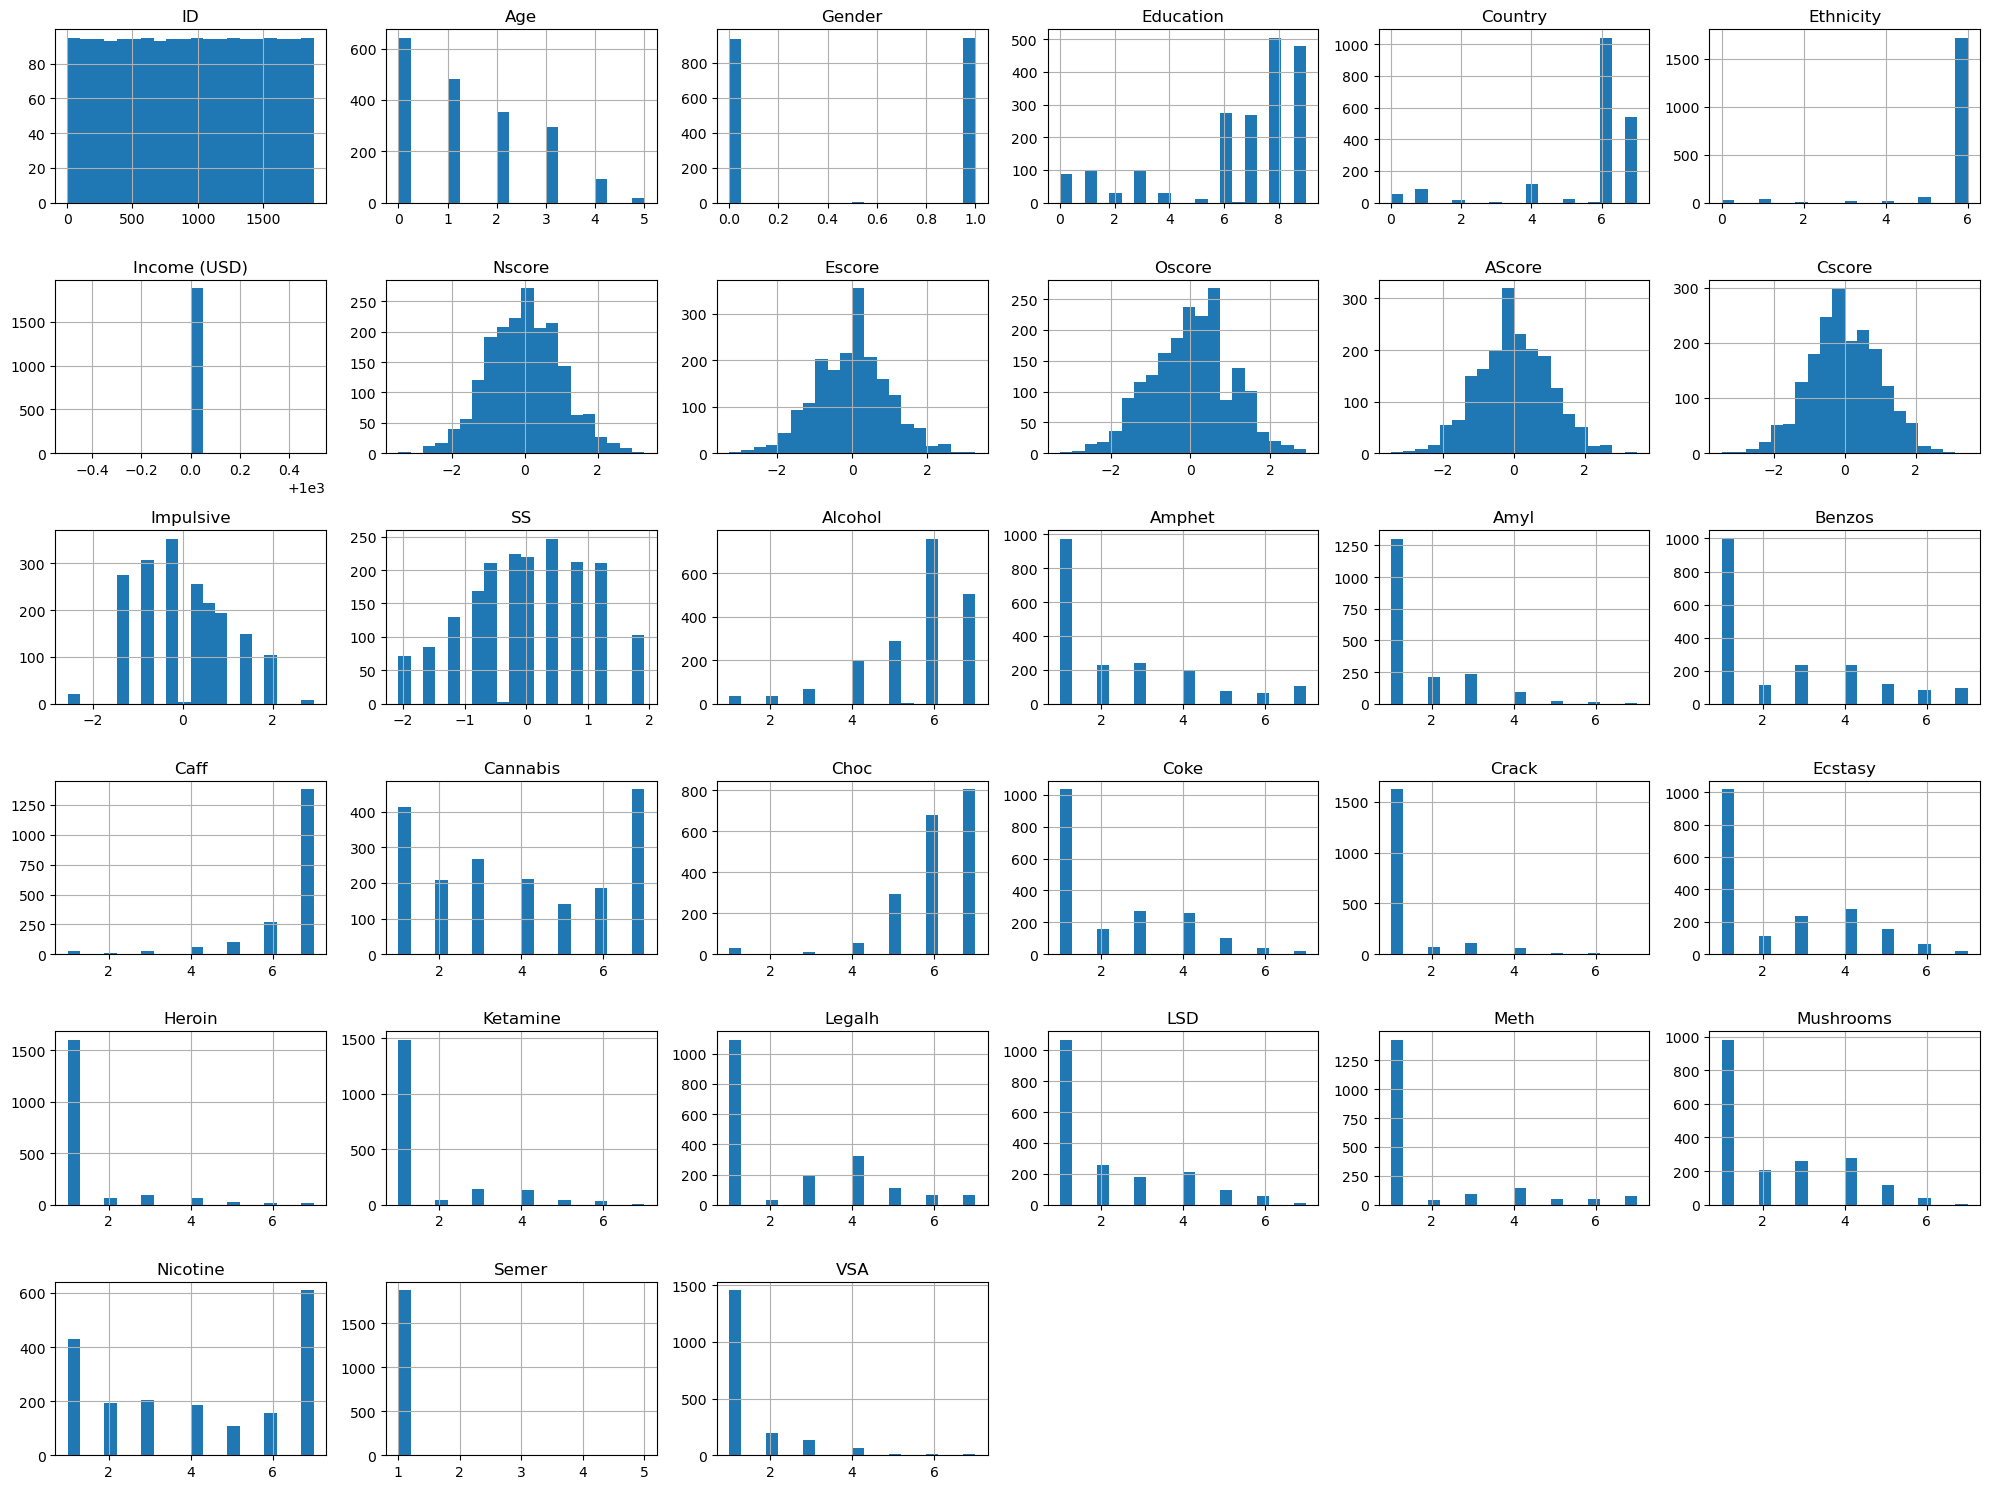

In [294]:
copia_tabela.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

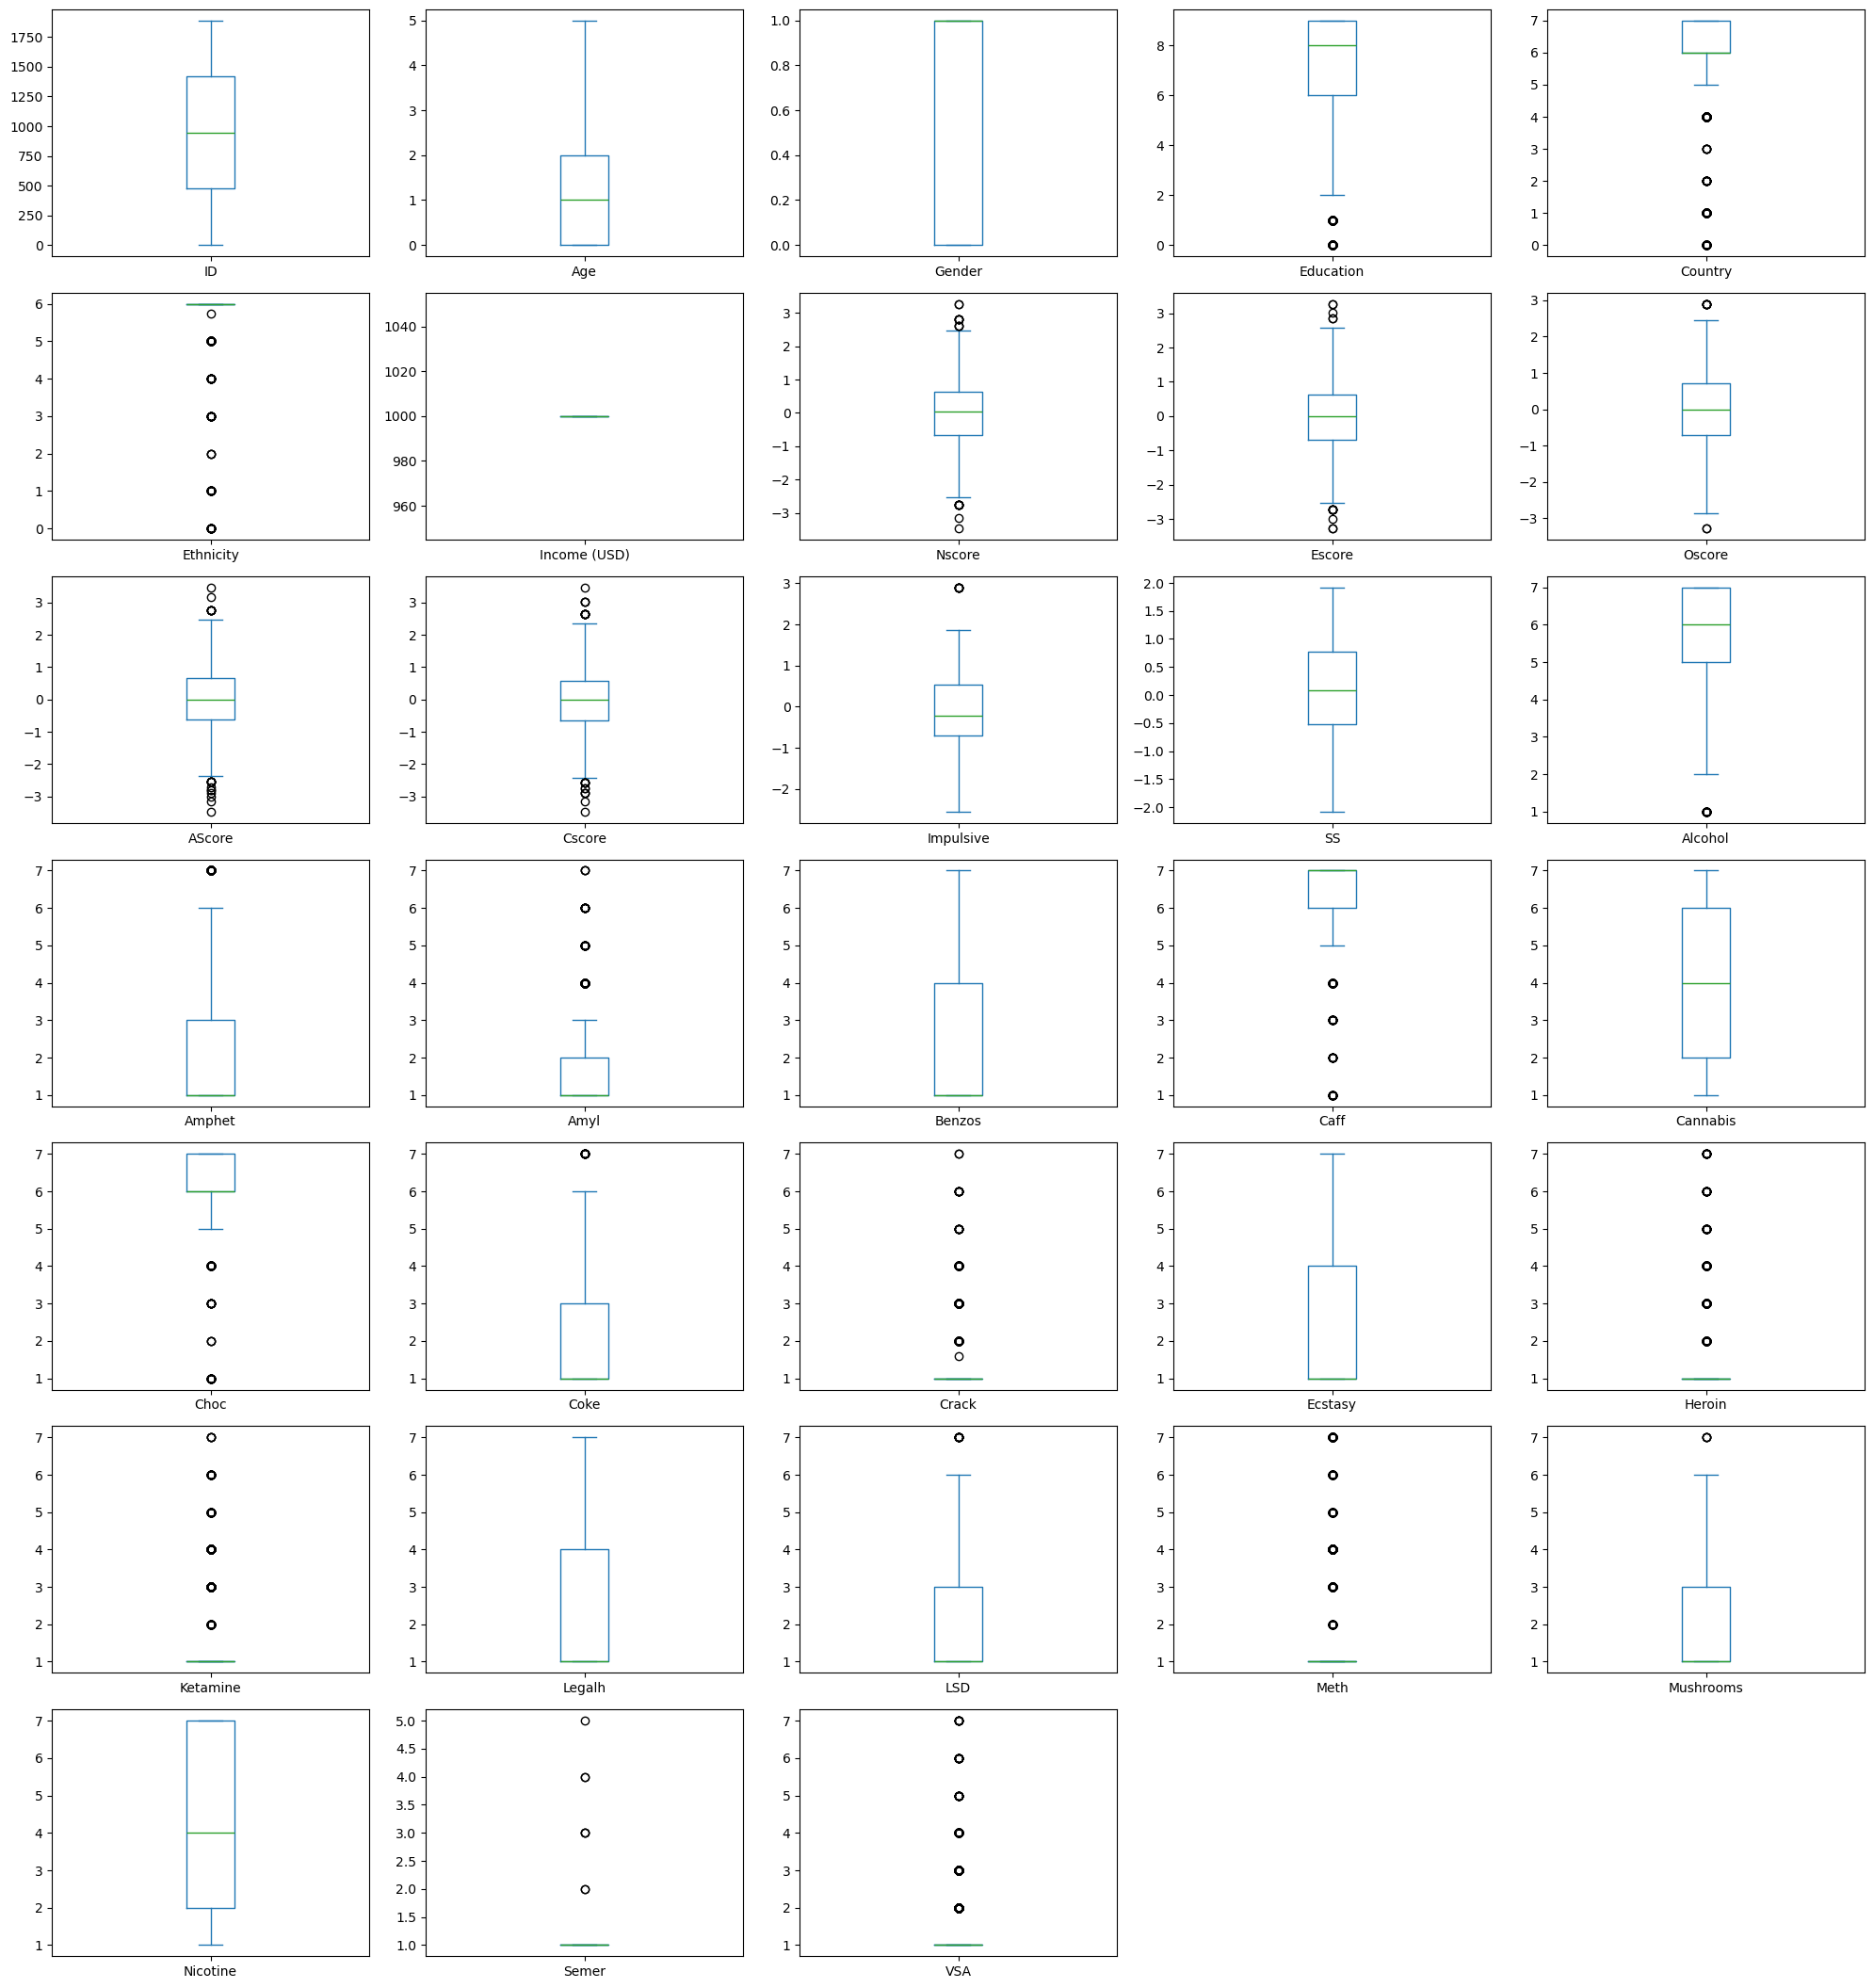

In [295]:
copia_tabela.plot(kind='box', subplots=True, layout=(10, 5), figsize=(20, 30), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

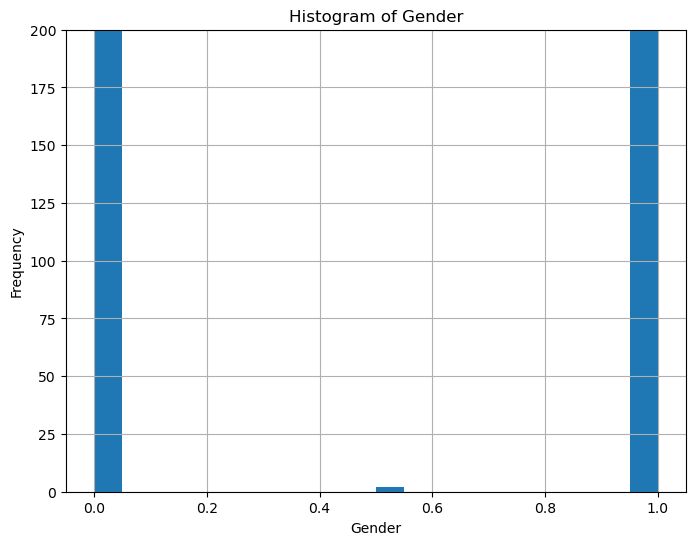

In [296]:
plt.figure(figsize=(8, 6))
copia_tabela['Gender'].hist(bins=20)
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.ylim(0, 200)
plt.show()


In [297]:
paises = data['Country'].astype('category').cat.categories
for i in range(len(paises)):
  print(f"Code: {i}, Country: {paises[i]}")

print('-'*20)

idades = data['Age'].astype('category').cat.categories
for i in range(len(idades)):
  print(f"Code: {i}, Age: {idades[i]}")

print('-'*20)

edu = data['Education'].astype('category').cat.categories
for i in range(len(edu)):
  print(f"Code: {i}, edu: {edu[i]}")

print('-'*20)

Ethnicity = data['Ethnicity'].astype('category').cat.categories
for i in range(len(Ethnicity)):
  print(f"Code: {i}, eth: {Ethnicity[i]}")


    

Code: 0, Country: Australia
Code: 1, Country: Canada
Code: 2, Country: EUA
Code: 3, Country: New Zealand
Code: 4, Country: Other
Code: 5, Country: Republic of Ireland
Code: 6, Country: UK
Code: 7, Country: USA
--------------------
Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+
--------------------
Code: 0, edu: Doctorate degree
Code: 1, edu: Left school at 16 years
Code: 2, edu: Left school at 17 years
Code: 3, edu: Left school at 18 years
Code: 4, edu: Left school before 16 years
Code: 5, edu: Master degree
Code: 6, edu: Masters degree
Code: 7, edu: Professional certificate/ diploma
Code: 8, edu: Some college or university, no certificate or degree
Code: 9, edu: University degree
--------------------
Code: 0, eth: Asian
Code: 1, eth: Black
Code: 2, eth: Mixed-Black/Asian
Code: 3, eth: Mixed-White/Asian
Code: 4, eth: Mixed-White/Black
Code: 5, eth: Other
Code: 6, eth: White


In [298]:
#dá pra ver que tem alguns valores estranhos, nesse contexto aqui era pra ser algo binário, a mesma coisa ocorre em 'Gender', 'Education', 'Country', 'Ethnicity', 'Impulsive', pois utilizei KNN, por causa desses valores inconstantes que podem mudar os dados ou interpretação e como temos um grande grupo amostral irei remove-los
#vendo elementos unicos
for col in ['Gender', 'Education', 'Country', 'Ethnicity']:
    print(copia_tabela[col].unique().tolist())

[1.0, 0.0, 0.5015957446808511, 0.5]
[0.0, 7.0, 6.0, 3.0, 1.0, 9.0, 8.0, 4.0, 5.0, 2.0, 6.64274322169059]
[6.0, 1.0, 7.0, 4.0, 0.0, 5.70631970260223, 5.0, 3.0, 2.0]
[6.0, 5.0, 4.0, 0.0, 5.738044633368757, 3.0, 1.0, 2.0]


In [299]:
def remove_rows_with_value(df, value):
  return df[~df.eq(value).any(axis=1)]

print(copia_tabela.head(93))

copia_tabela = remove_rows_with_value(copia_tabela, 0.5015957446808511)

copia_tabela.to_csv('Drugs4.csv', index=False)

    ID  Age    Gender  Education  Country  Ethnicity  Income (USD)    Nscore  \
0    2  1.0  1.000000   0.000000  6.00000   6.000000        1000.0 -0.678250   
1    3  2.0  1.000000   7.000000  6.00000   6.000000        1000.0 -0.467250   
2    4  0.0  0.000000   6.000000  6.00000   6.000000        1000.0 -0.148820   
3    5  2.0  0.000000   0.000000  6.00000   6.000000        1000.0  0.735450   
4    6  5.0  0.000000   3.000000  1.00000   6.000000        1000.0 -0.678250   
..  ..  ...       ...        ...      ...        ...           ...       ...   
88  90  2.0  0.000000   6.000000  6.00000   6.000000        1000.0  0.910930   
89  91  2.0  0.000000   6.000000  6.00000   6.000000        1000.0  1.372970   
90  92  2.0  1.000000   7.000000  1.00000   6.000000        1000.0  0.416670   
91  93  1.0  1.000000   3.000000  6.00000   6.000000        1000.0 -1.550780   
92  94  5.0  0.501596   6.642743  5.70632   5.738045        1000.0 -0.147962   

      Escore   Oscore  ...  Ecstasy  He

In [300]:
for col in ['Gender', 'Education', 'Country', 'Ethnicity']:
    print(sorted(copia_tabela[col].unique().tolist()))

[0.0, 0.5, 1.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [301]:
copia_tabela = remove_rows_with_value(copia_tabela, 0.5)

In [302]:
for col in ['Gender', 'Education', 'Country', 'Ethnicity']:
    print(sorted(copia_tabela[col].unique().tolist()))

[0.0, 1.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


2. Qual é a distribuição da idade dos indivíduos na amostra? Existem diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias?

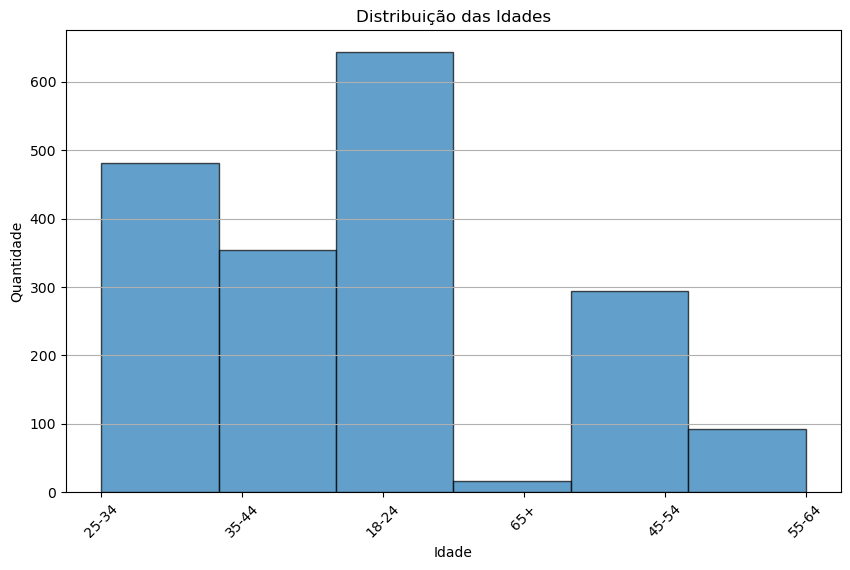

In [303]:
idades = {
    0: "18-24",
    1: "25-34",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65+"
}

copia_tabela['idades'] = copia_tabela['Age'].map(idades)

plt.figure(figsize=(10, 6))
plt.hist(copia_tabela['idades'], bins=len(idades), edgecolor='black', alpha=0.7)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

Para responder a parte 2, Existem diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias?
Eu irei considerar uma pessoa como usária de substância se ela consumiu no ultimo 1 ano, portanto, CL3, portanto para meu código 'CL0': 1, 'CL1': 2, 'CL2': 3, 'CL3': 4, 'CL4': 5, 'CL5': 6, 'CL6': 7; CL3 é o 4, logo o que é preciso é visualizar o consumo por droga da faixa etária 
 4o 

- CL0 Nunca Usou
- CL1 Usou Mais de Uma Década Atrás
- CL2 Usou nos Últimos Dez Anos
- CL3 Usou no Último Ano (59 vezes)
- CL4 Usou nos Últimos Meses
- CL5 Usou na Última Semana
- CL6 Usou Hoje

----------
Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+
----------
Distribuição das idades para Alcohol:
Usuários: idades
18-24    616
25-34    454
35-44    320
45-54    263
55-64     80
65+       13
Name: count, dtype: int64
Não-usuários: idades
35-44    34
45-54    31
25-34    27
18-24    27
55-64    13
65+       4
Name: count, dtype: int64


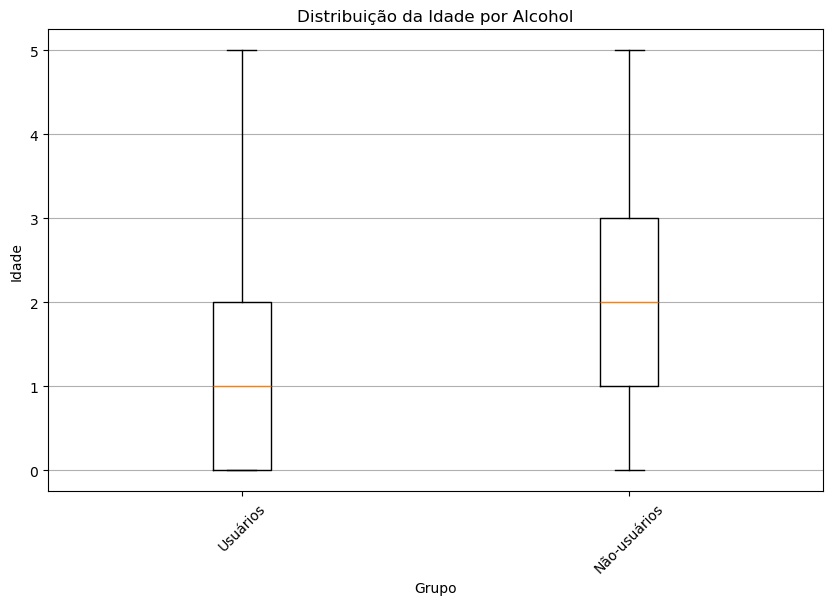

Distribuição das idades para Amphet:
Usuários: idades
18-24    259
25-34    107
35-44     36
45-54     31
55-64      3
Name: count, dtype: int64
Não-usuários: idades
18-24    384
25-34    374
35-44    318
45-54    263
55-64     90
65+       17
Name: count, dtype: int64


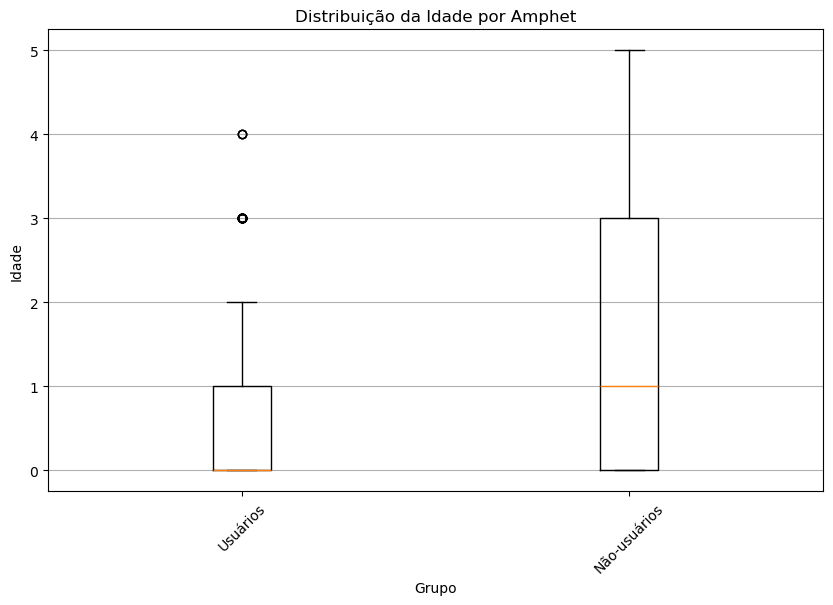

Distribuição das idades para Amyl:
Usuários: idades
18-24    73
25-34    42
35-44    13
45-54     5
Name: count, dtype: int64
Não-usuários: idades
18-24    570
25-34    439
35-44    341
45-54    289
55-64     93
65+       17
Name: count, dtype: int64


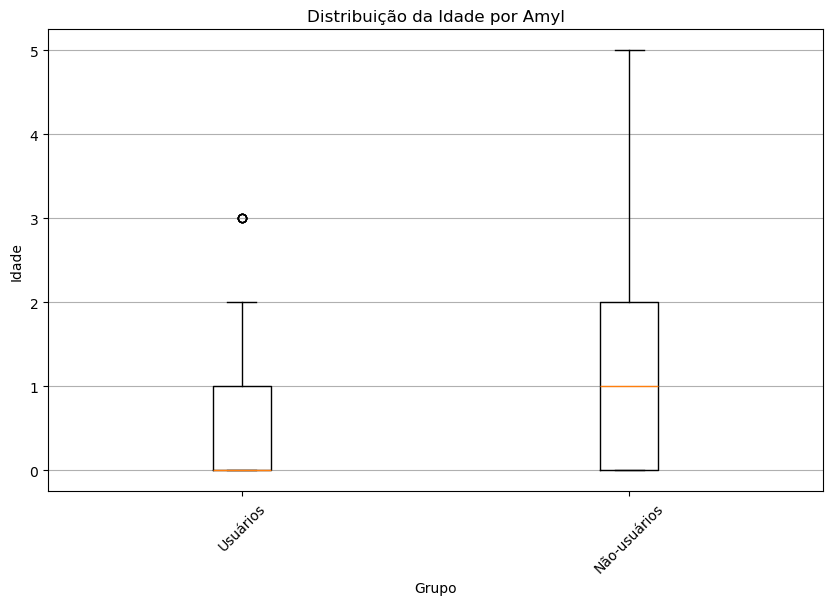

Distribuição das idades para Benzos:
Usuários: idades
18-24    243
25-34    156
35-44     69
45-54     53
55-64     10
65+        4
Name: count, dtype: int64
Não-usuários: idades
18-24    400
25-34    325
35-44    285
45-54    241
55-64     83
65+       13
Name: count, dtype: int64


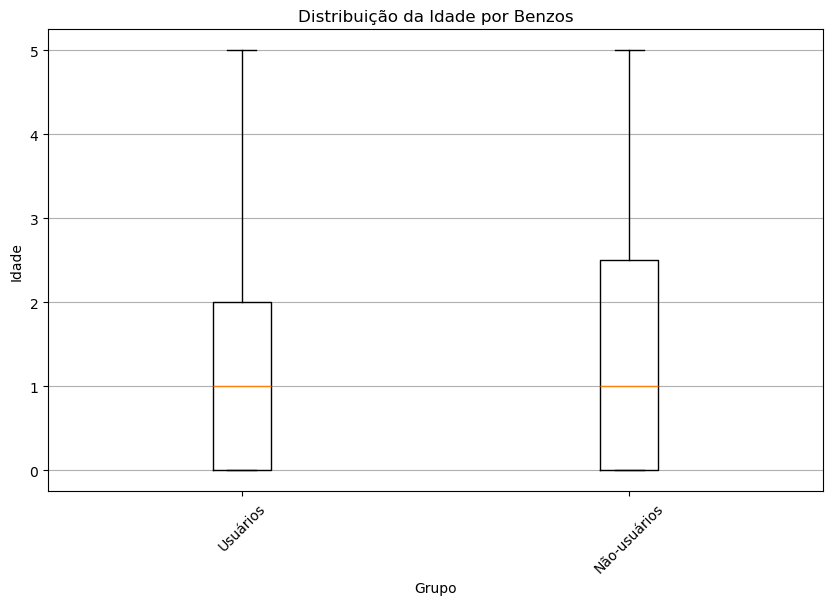

Distribuição das idades para Caff:
Usuários: idades
18-24    630
25-34    466
35-44    343
45-54    278
55-64     88
65+       16
Name: count, dtype: int64
Não-usuários: idades
45-54    16
25-34    15
18-24    13
35-44    11
55-64     5
65+       1
Name: count, dtype: int64


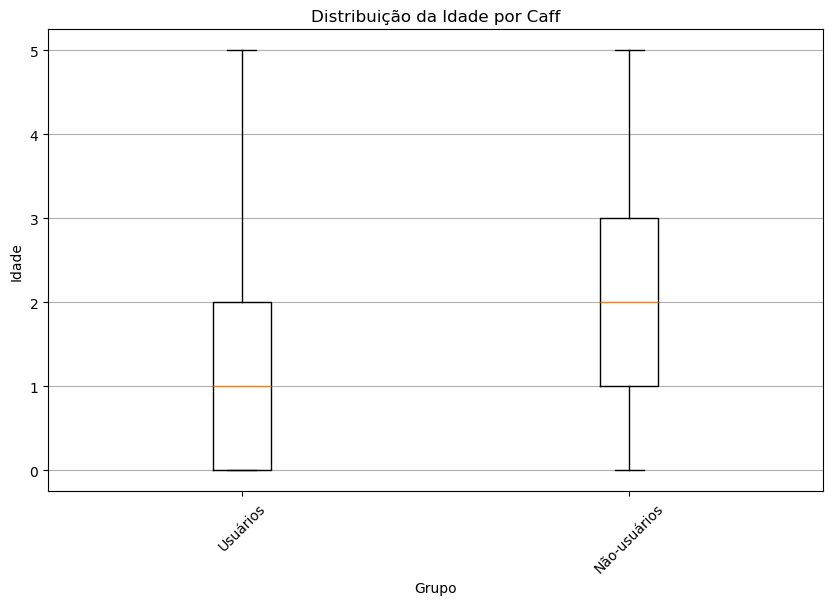

Distribuição das idades para Cannabis:
Usuários: idades
18-24    536
25-34    238
35-44    123
45-54     75
55-64     26
65+        1
Name: count, dtype: int64
Não-usuários: idades
25-34    243
35-44    231
45-54    219
18-24    107
55-64     67
65+       16
Name: count, dtype: int64


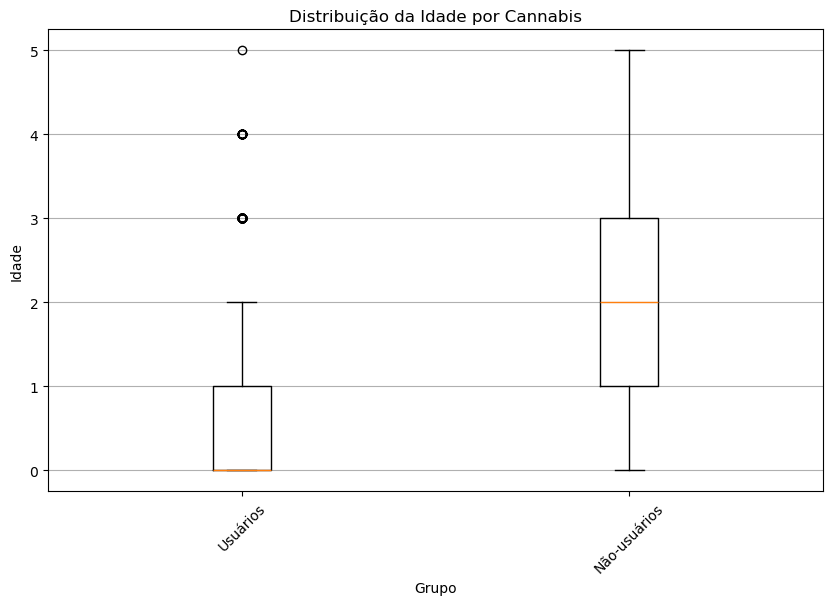

Distribuição das idades para Choc:
Usuários: idades
18-24    633
25-34    467
35-44    341
45-54    290
55-64     91
65+       15
Name: count, dtype: int64
Não-usuários: idades
25-34    14
35-44    13
18-24    10
45-54     4
55-64     2
65+       2
Name: count, dtype: int64


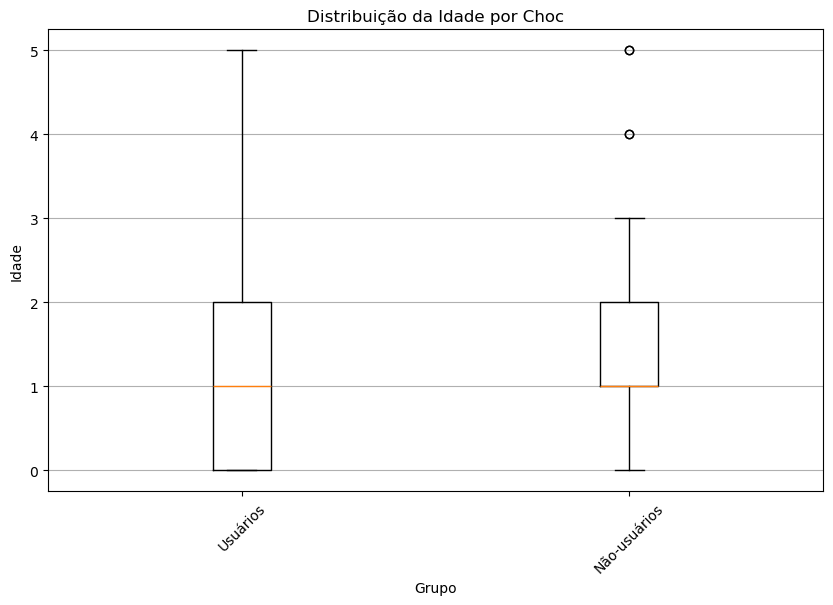

Distribuição das idades para Coke:
Usuários: idades
18-24    226
25-34    122
35-44     45
45-54     20
55-64      4
Name: count, dtype: int64
Não-usuários: idades
18-24    417
25-34    359
35-44    309
45-54    274
55-64     89
65+       17
Name: count, dtype: int64


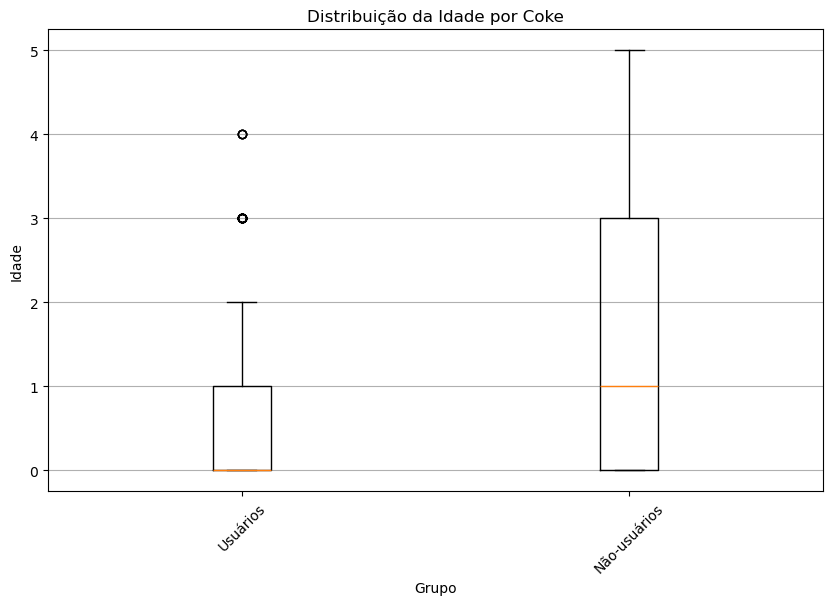

Distribuição das idades para Crack:
Usuários: idades
18-24    42
25-34    19
35-44    12
45-54     4
55-64     2
Name: count, dtype: int64
Não-usuários: idades
18-24    601
25-34    462
35-44    342
45-54    290
55-64     91
65+       17
Name: count, dtype: int64


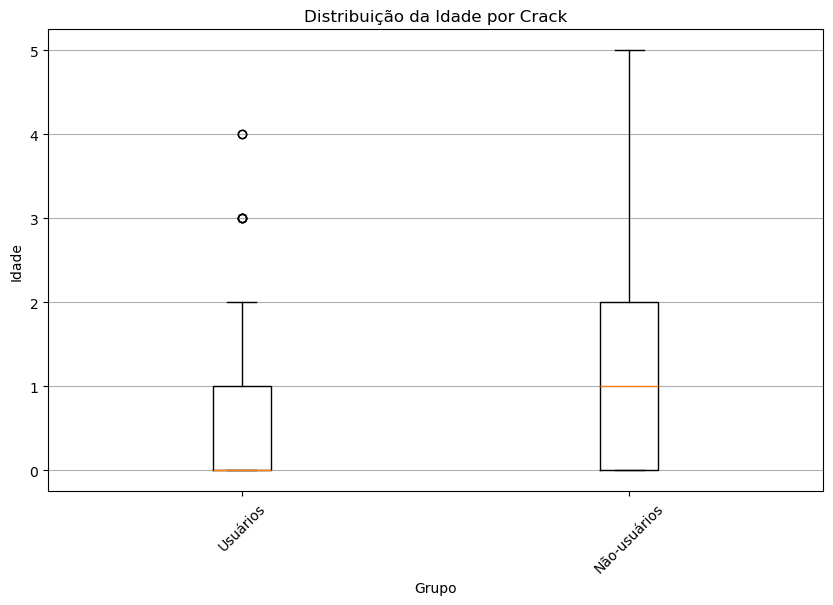

Distribuição das idades para Ecstasy:
Usuários: idades
18-24    325
25-34    126
35-44     44
45-54     19
55-64      3
Name: count, dtype: int64
Não-usuários: idades
25-34    355
18-24    318
35-44    310
45-54    275
55-64     90
65+       17
Name: count, dtype: int64


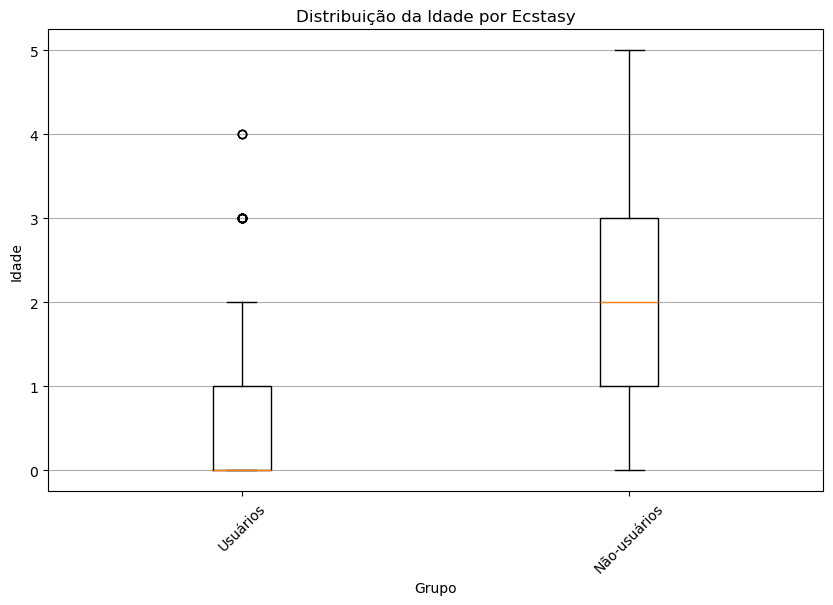

Distribuição das idades para Heroin:
Usuários: idades
18-24    70
25-34    32
35-44    10
45-54     6
Name: count, dtype: int64
Não-usuários: idades
18-24    573
25-34    449
35-44    344
45-54    288
55-64     93
65+       17
Name: count, dtype: int64


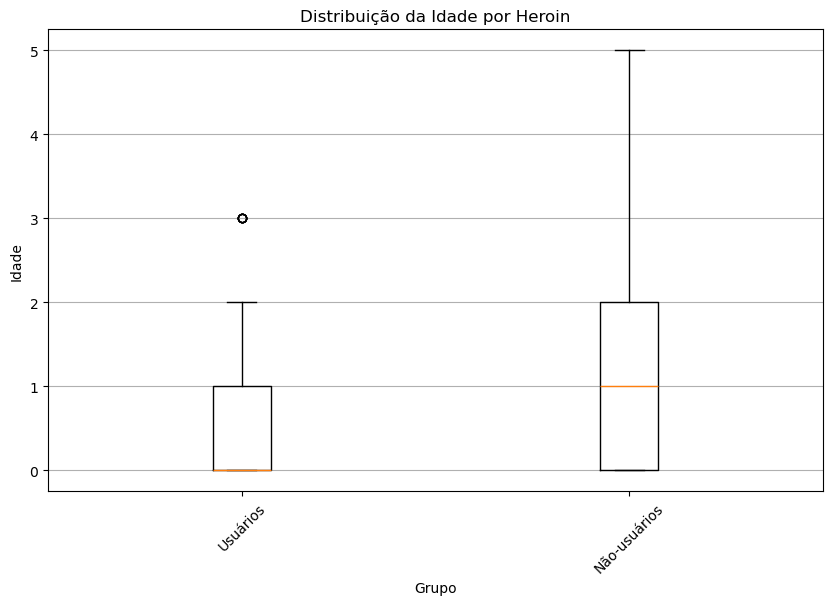

Distribuição das idades para Ketamine:
Usuários: idades
18-24    133
25-34     54
35-44     14
45-54      6
55-64      1
Name: count, dtype: int64
Não-usuários: idades
18-24    510
25-34    427
35-44    340
45-54    288
55-64     92
65+       17
Name: count, dtype: int64


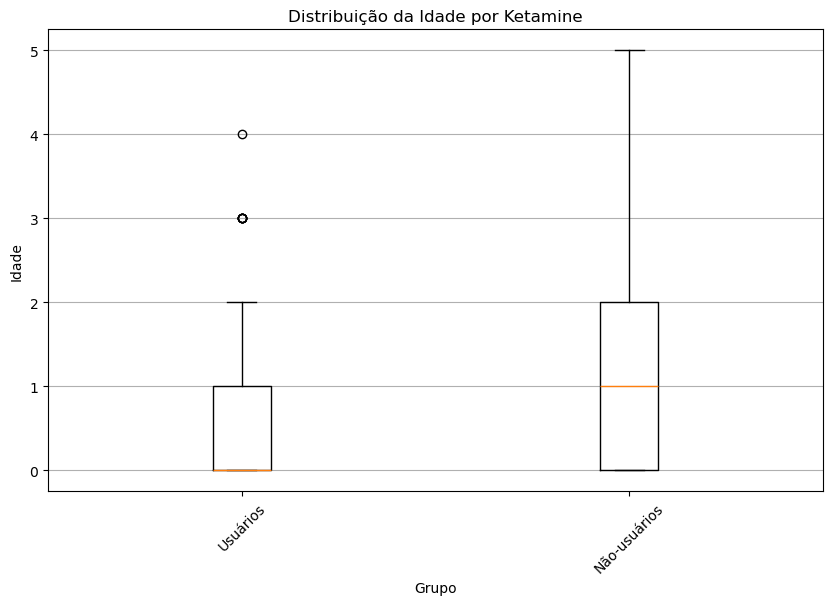

Distribuição das idades para Legalh:
Usuários: idades
18-24    361
25-34    120
35-44     51
45-54     25
55-64      7
Name: count, dtype: int64
Não-usuários: idades
25-34    361
35-44    303
18-24    282
45-54    269
55-64     86
65+       17
Name: count, dtype: int64


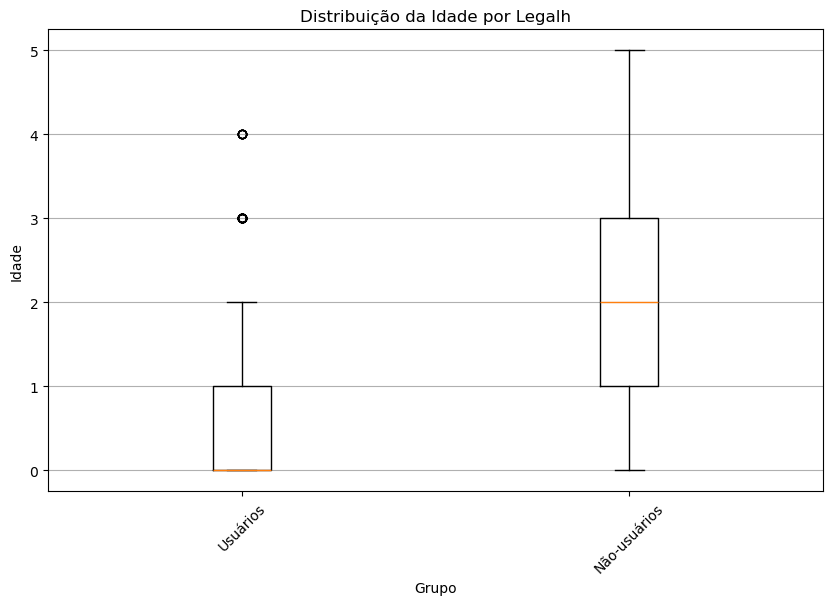

Distribuição das idades para LSD:
Usuários: idades
18-24    274
25-34     81
35-44     15
45-54     10
Name: count, dtype: int64
Não-usuários: idades
25-34    400
18-24    369
35-44    339
45-54    284
55-64     93
65+       17
Name: count, dtype: int64


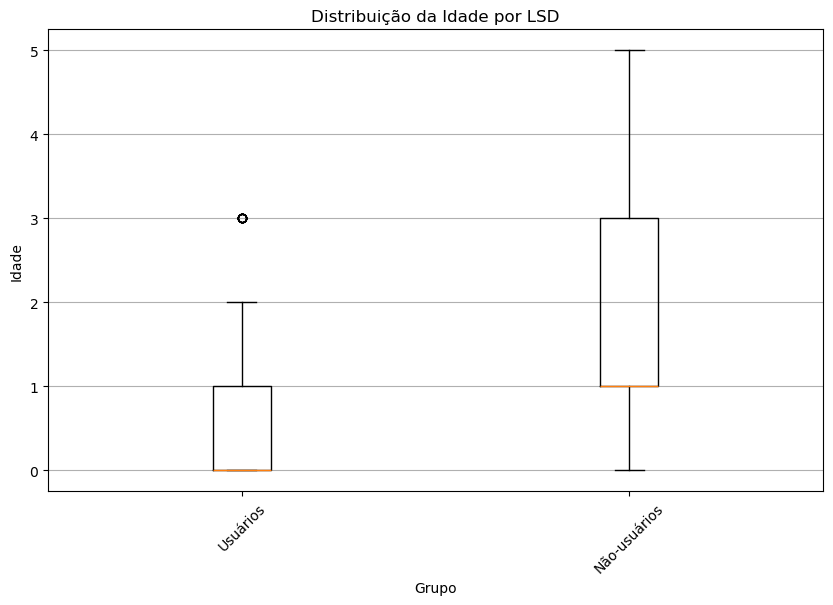

Distribuição das idades para Meth:
Usuários: idades
18-24    179
25-34     84
35-44     30
45-54     19
55-64      7
65+        1
Name: count, dtype: int64
Não-usuários: idades
18-24    464
25-34    397
35-44    324
45-54    275
55-64     86
65+       16
Name: count, dtype: int64


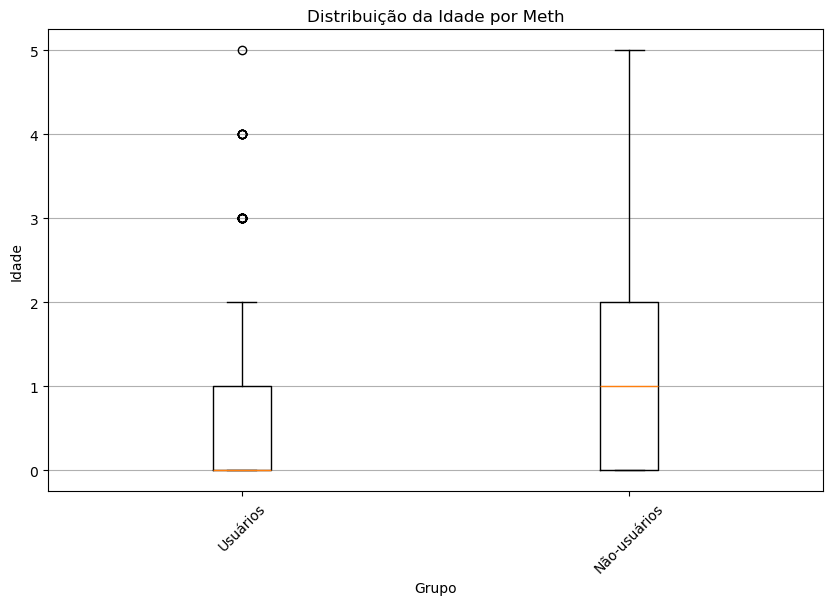

Distribuição das idades para Mushrooms:
Usuários: idades
18-24    290
25-34     99
35-44     30
45-54     11
55-64      4
Name: count, dtype: int64
Não-usuários: idades
25-34    382
18-24    353
35-44    324
45-54    283
55-64     89
65+       17
Name: count, dtype: int64


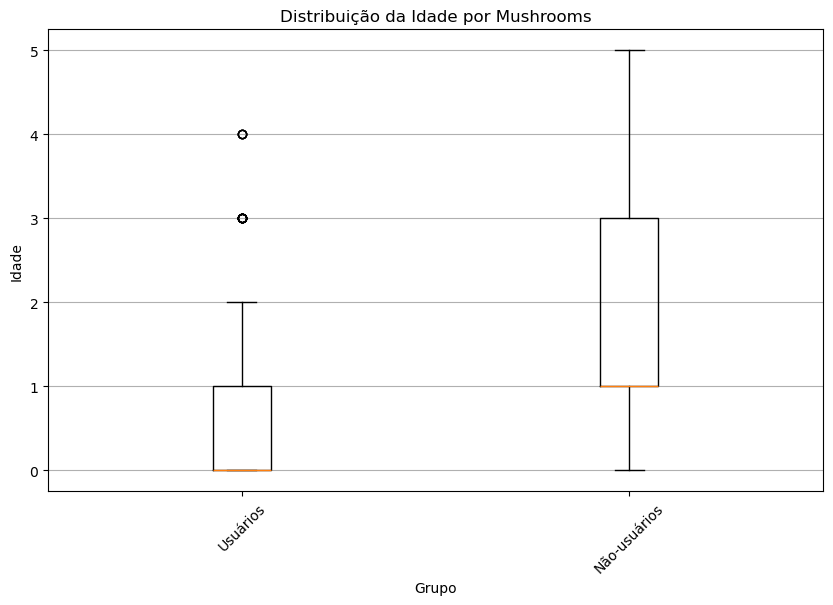

Distribuição das idades para Nicotine:
Usuários: idades
18-24    486
25-34    272
35-44    164
45-54    101
55-64     31
65+        5
Name: count, dtype: int64
Não-usuários: idades
25-34    209
45-54    193
35-44    190
18-24    157
55-64     62
65+       12
Name: count, dtype: int64


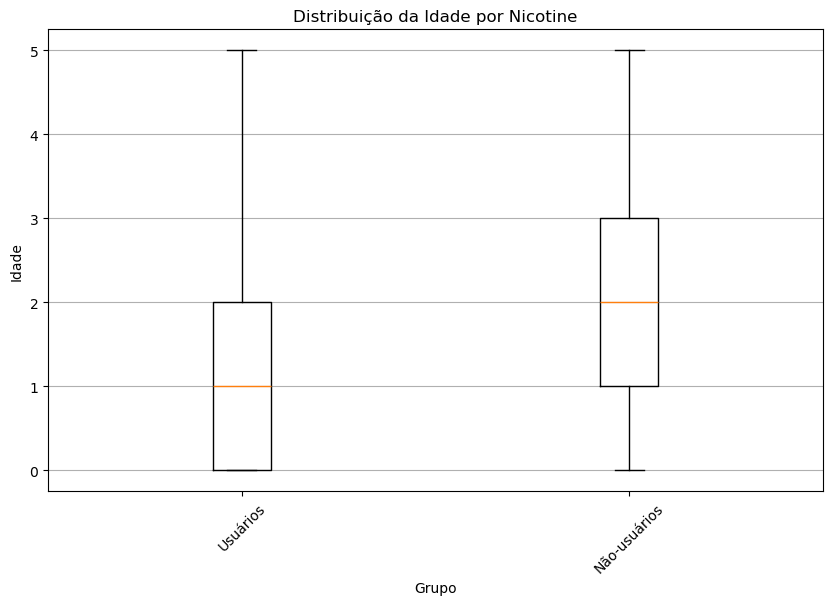

Distribuição das idades para Semer:
Usuários: idades
18-24    3
Name: count, dtype: int64
Não-usuários: idades
18-24    640
25-34    481
35-44    354
45-54    294
55-64     93
65+       17
Name: count, dtype: int64


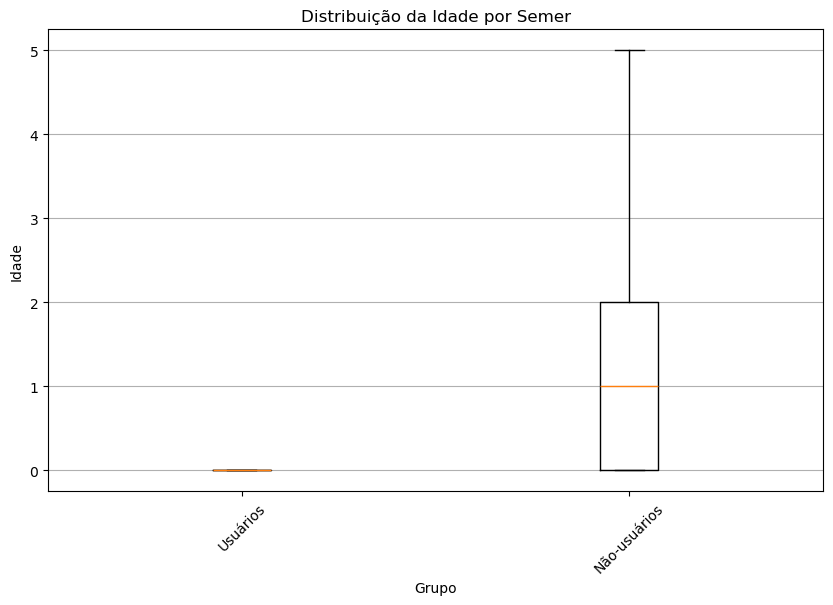

Distribuição das idades para VSA:
Usuários: idades
18-24    73
25-34    17
35-44     3
45-54     2
Name: count, dtype: int64
Não-usuários: idades
18-24    570
25-34    464
35-44    351
45-54    292
55-64     93
65+       17
Name: count, dtype: int64


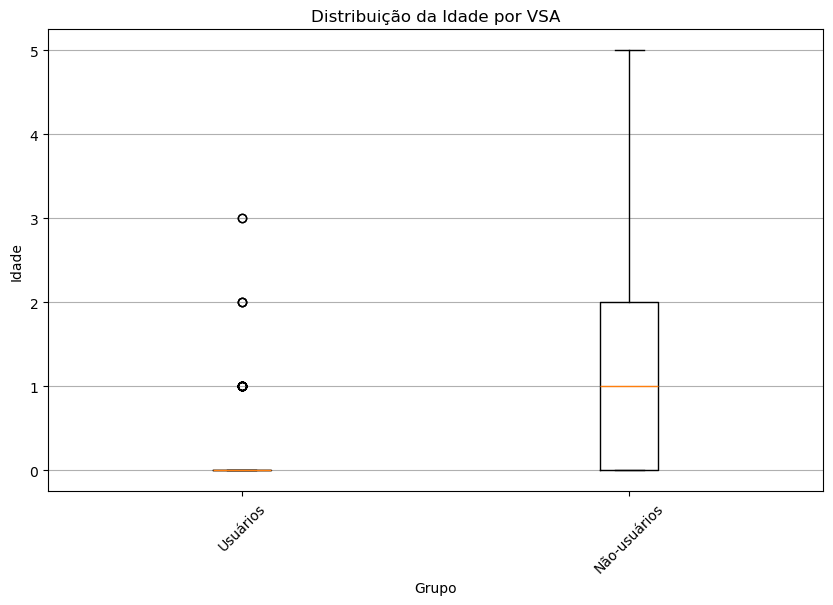

In [304]:
drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis','Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

#função para categorizar usuários e não-usuários
def categorize_user(value):
    if value >= 4:
        return 'user'
    else:
        return 'non-user'

#função para comparar a distribuição etária entre usuários e não-usuários
def compare_age_distribution(substance, tabela):

    users = tabela[ tabela [f'{substance}_User' ] == 'user']['idades']
    non_users = tabela[ tabela [f'{substance}_User' ] == 'non-user']['idades']
    
    return users, non_users

for substance in drug_columns:
    
    categorize_users(copia_tabela, substance)

print("-"*10)
for i in range(len(idades)):
  print(f"Code: {i}, Age: {idades[i]}")
print("-"*10)


for substance in drug_columns:
    
    users, non_users = compare_age_distribution(substance, copia_tabela)
    
    print(f"Distribuição das idades para {substance}:")
    print(f"Usuários: {users.value_counts()}")
    print(f"Não-usuários: {non_users.value_counts()}")

    plt.figure(figsize=(10, 6))
    
    plt.boxplot([copia_tabela[copia_tabela[f'{substance}_User'] == 'user']['Age'],
                 copia_tabela[copia_tabela[f'{substance}_User'] == 'non-user']['Age']],
                labels=['Usuários', 'Não-usuários'])


        
    plt.title(f'Distribuição da Idade por {substance}')
    plt.xlabel('Grupo')
    plt.ylabel('Idade')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()




3. Há uma relação entre o nível educacional e o consumo de substâncias?

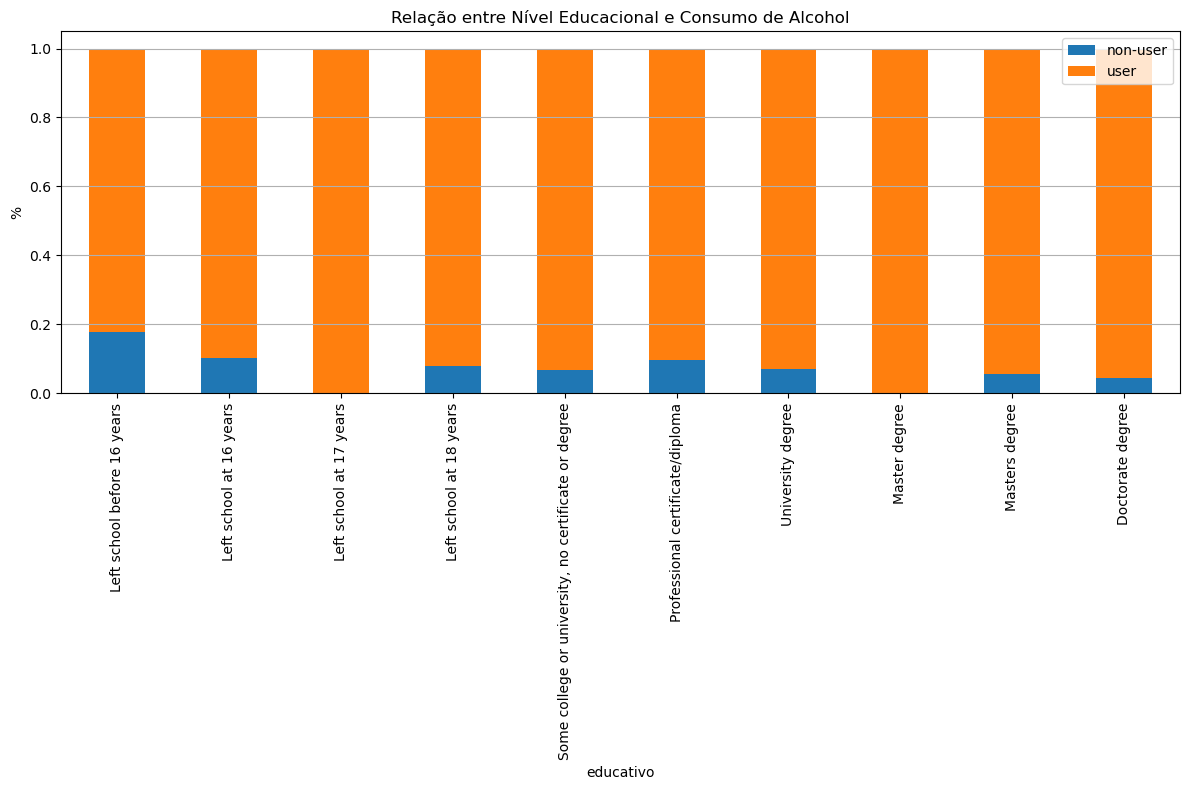

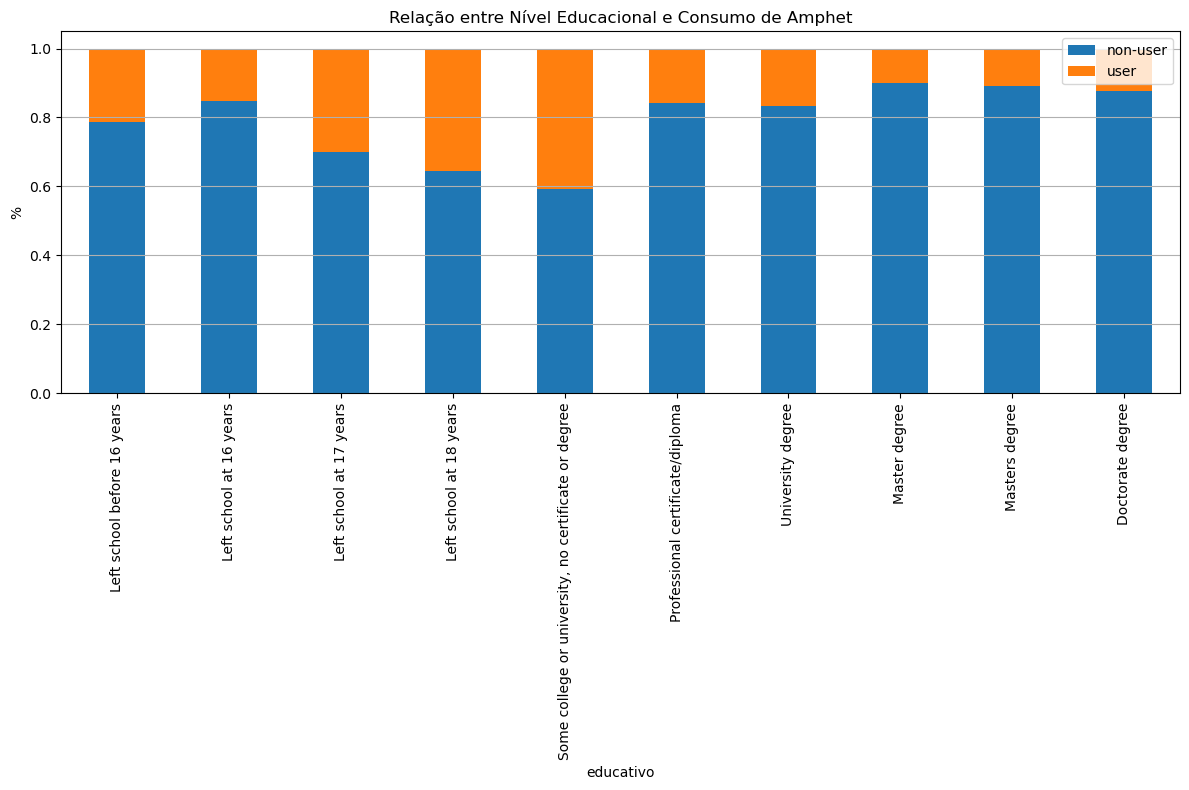

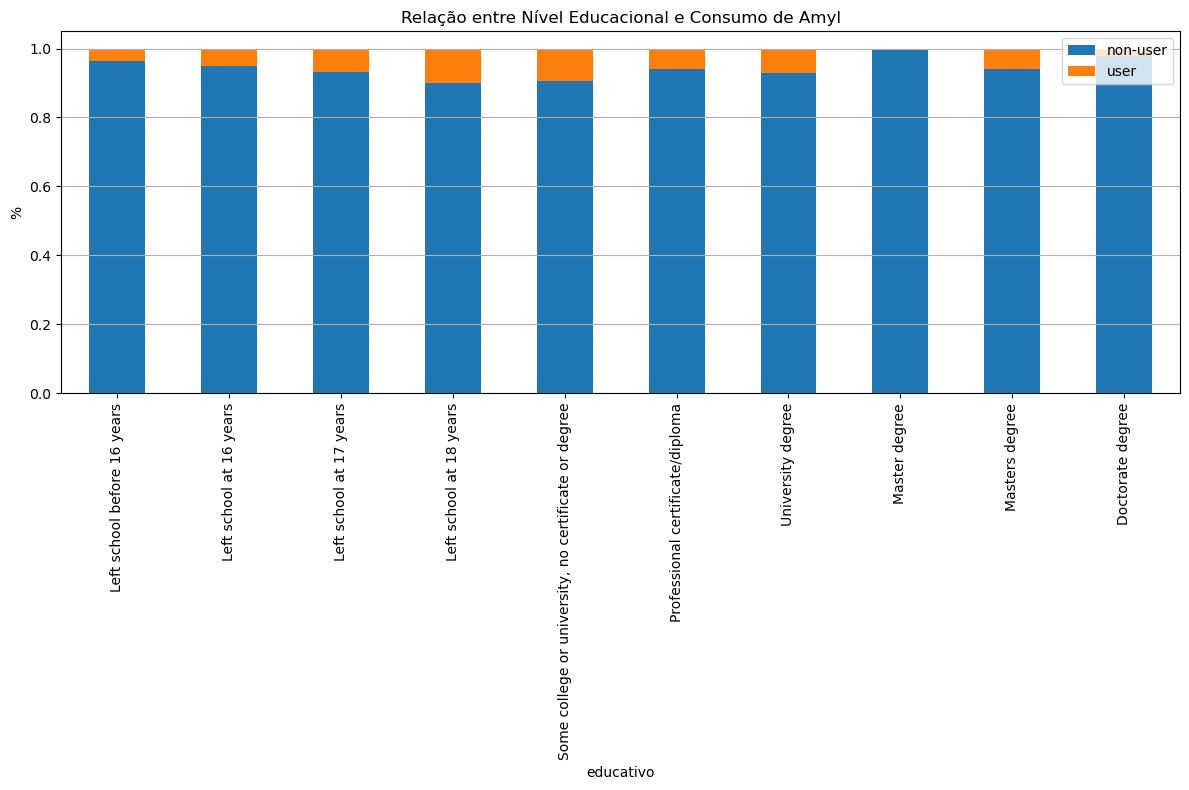

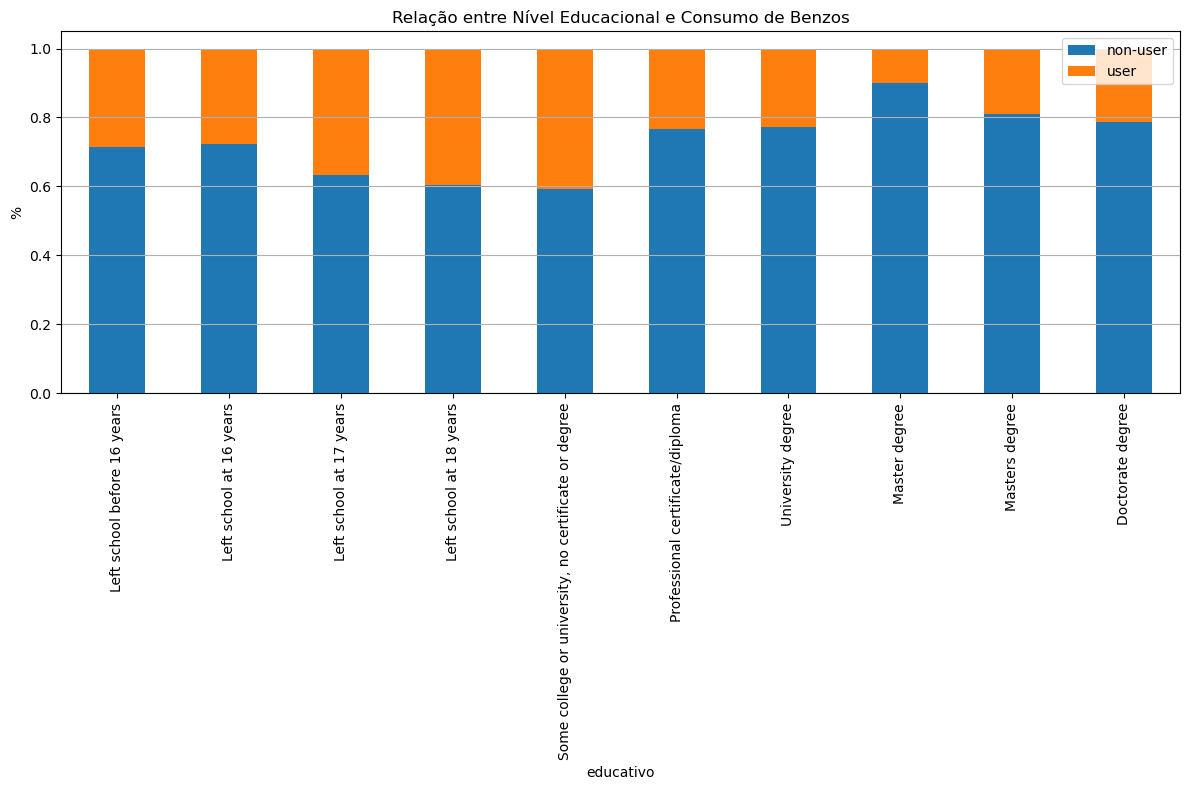

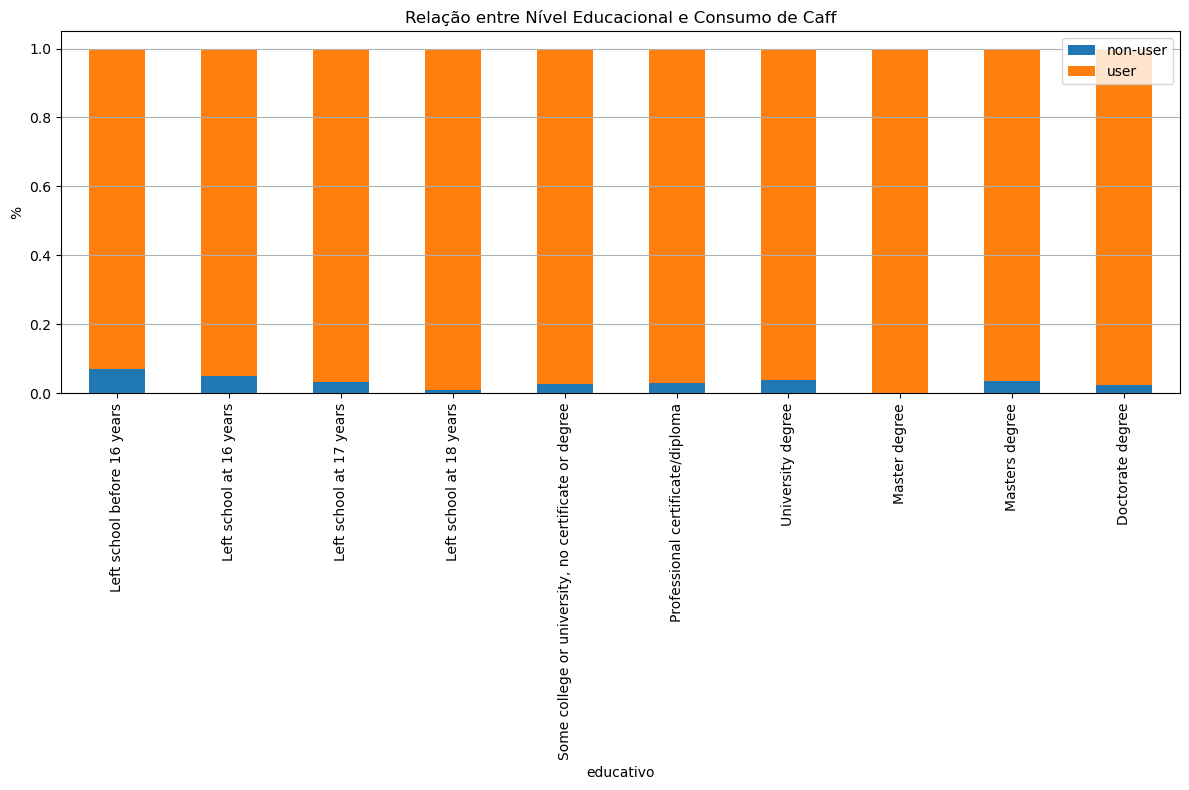

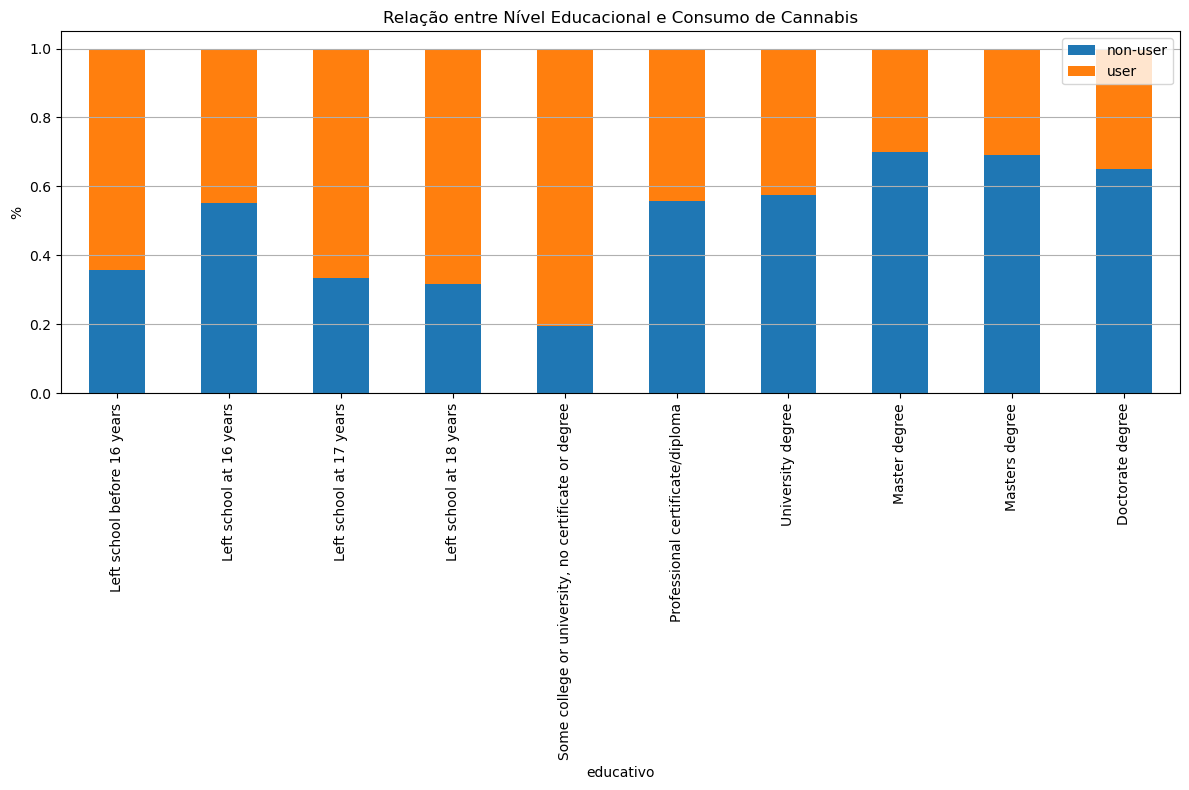

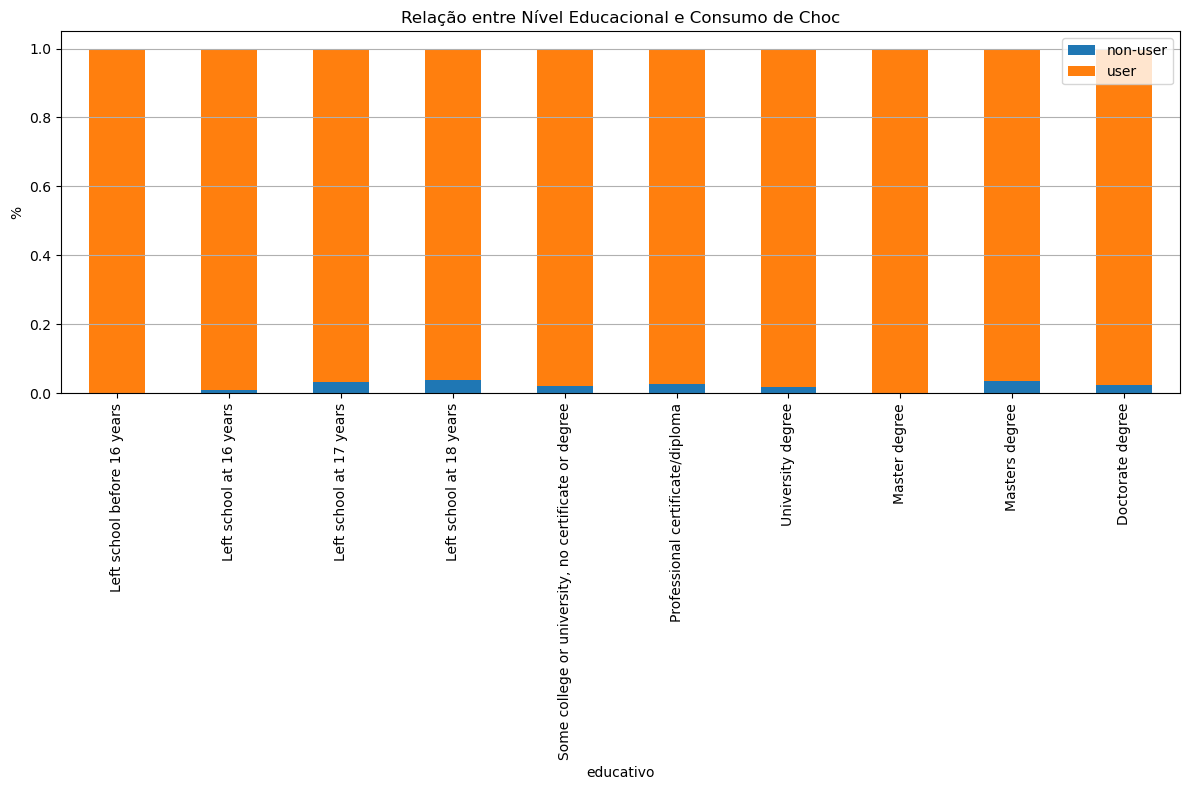

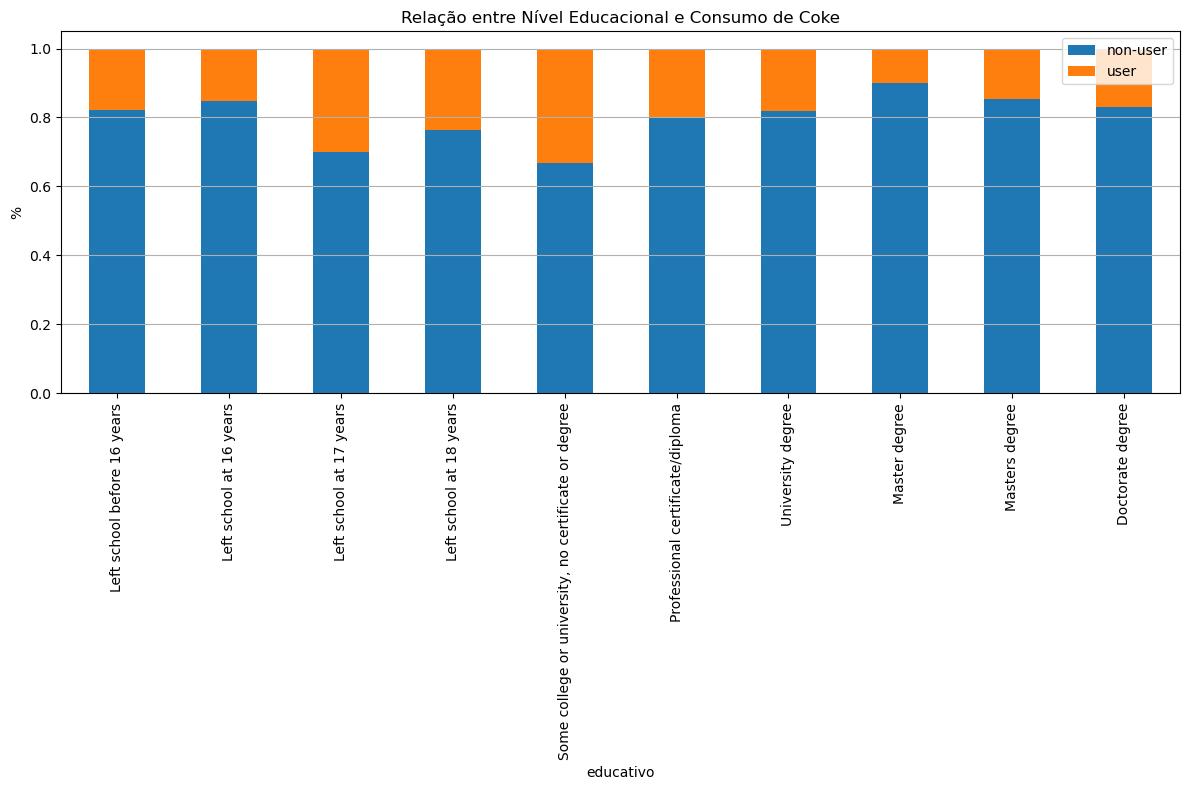

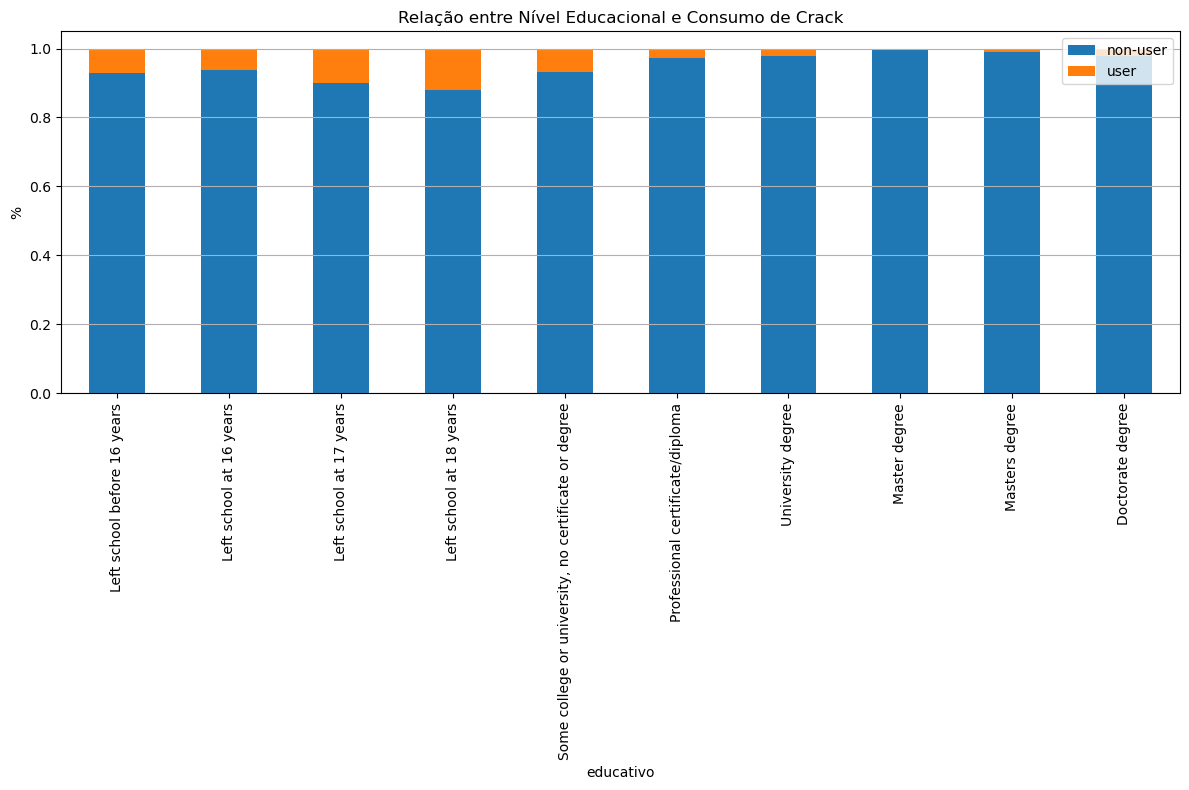

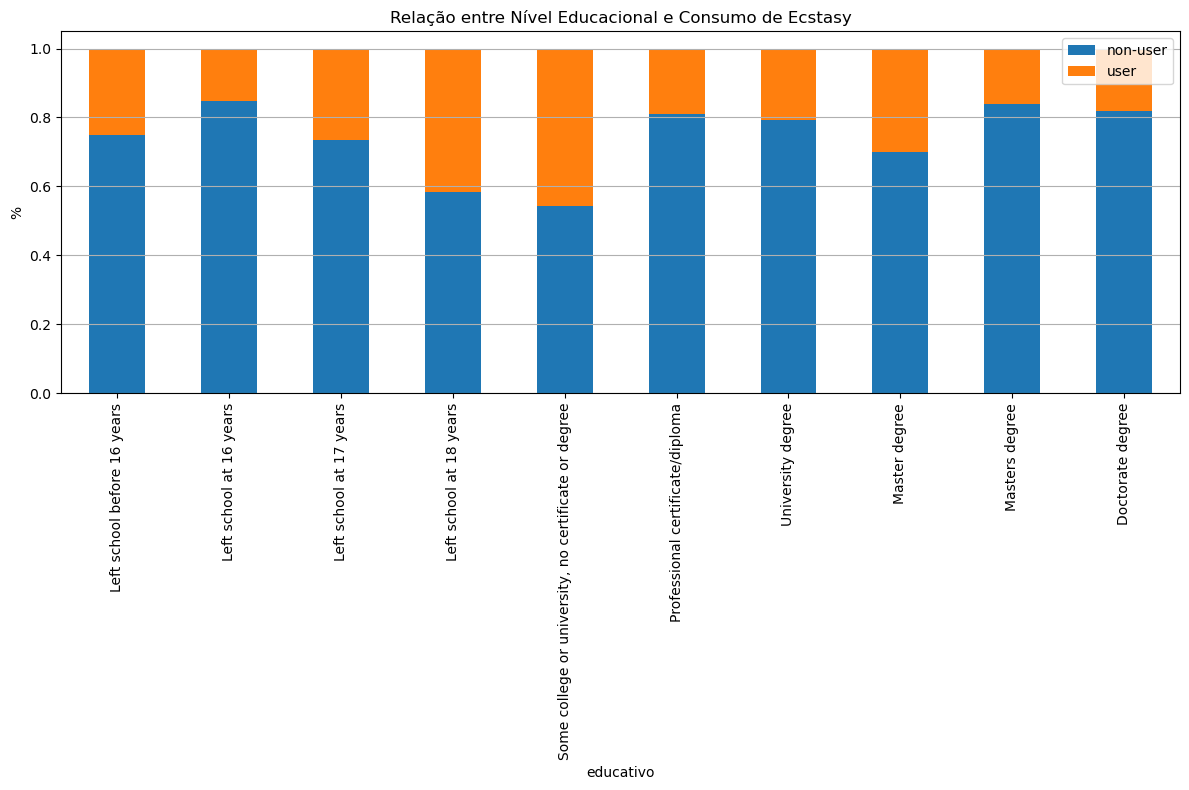

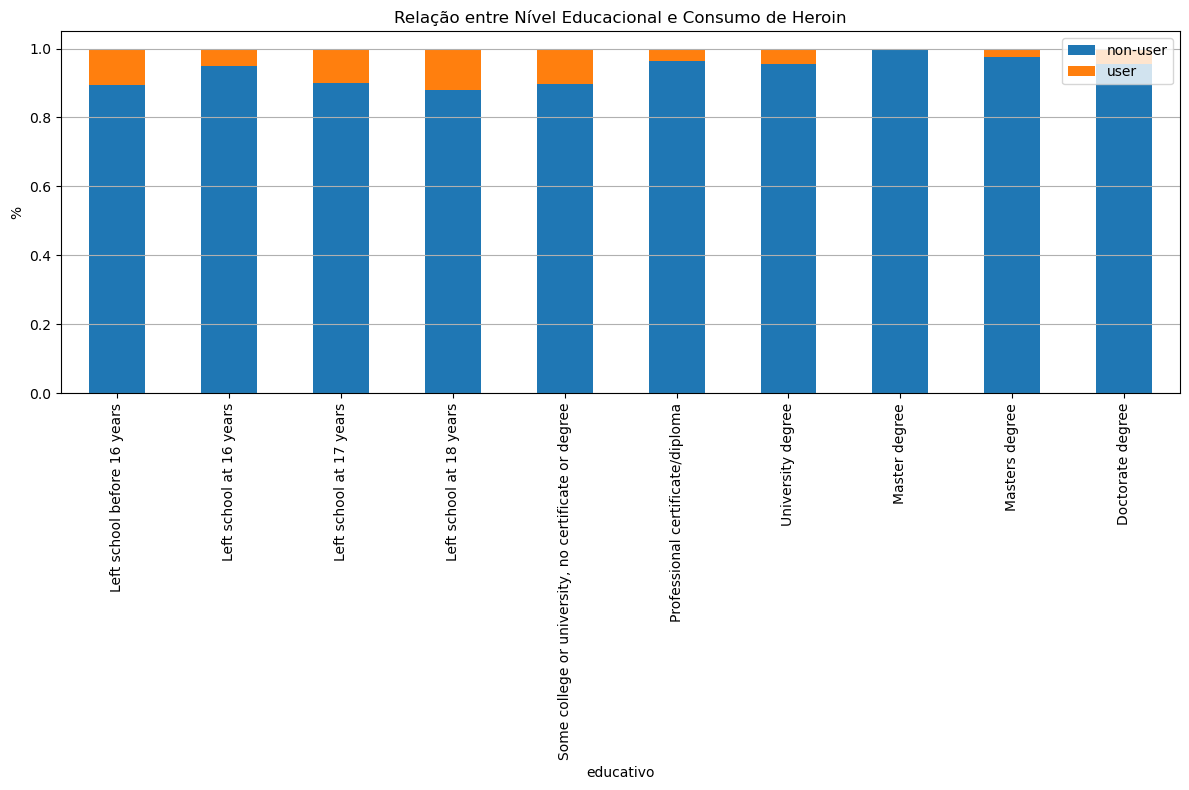

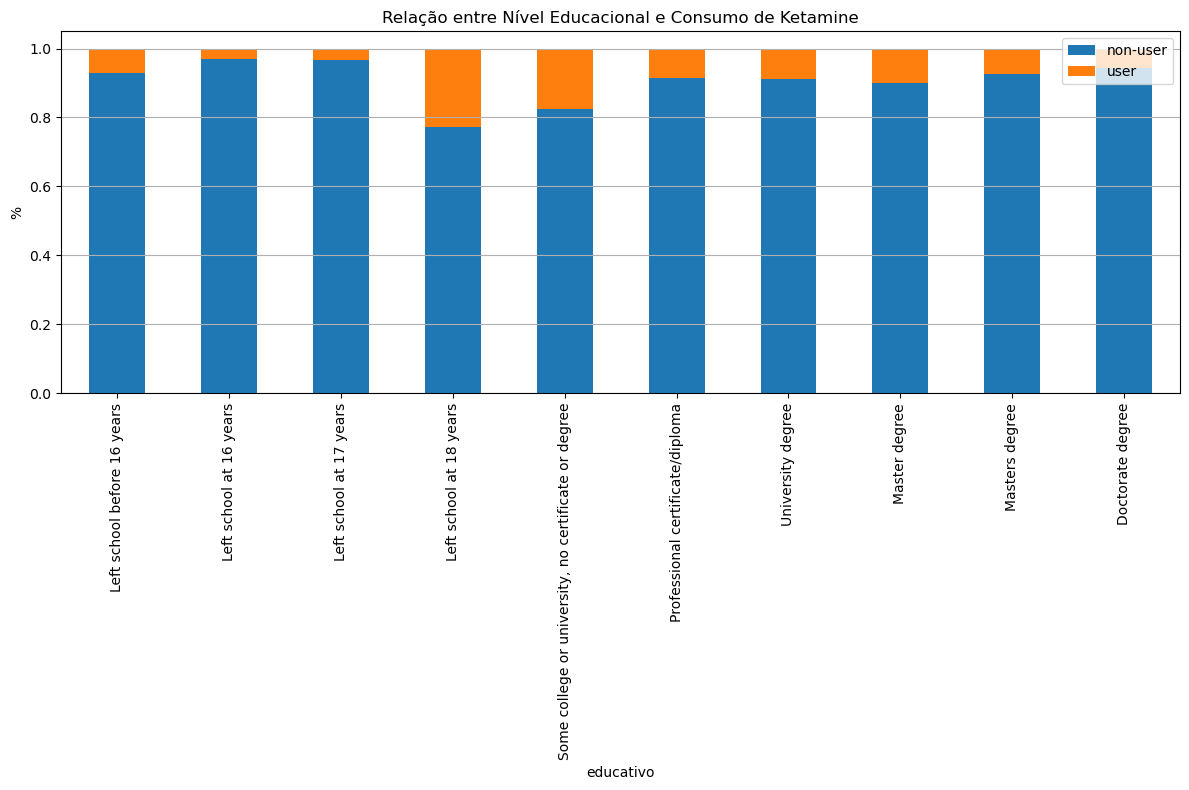

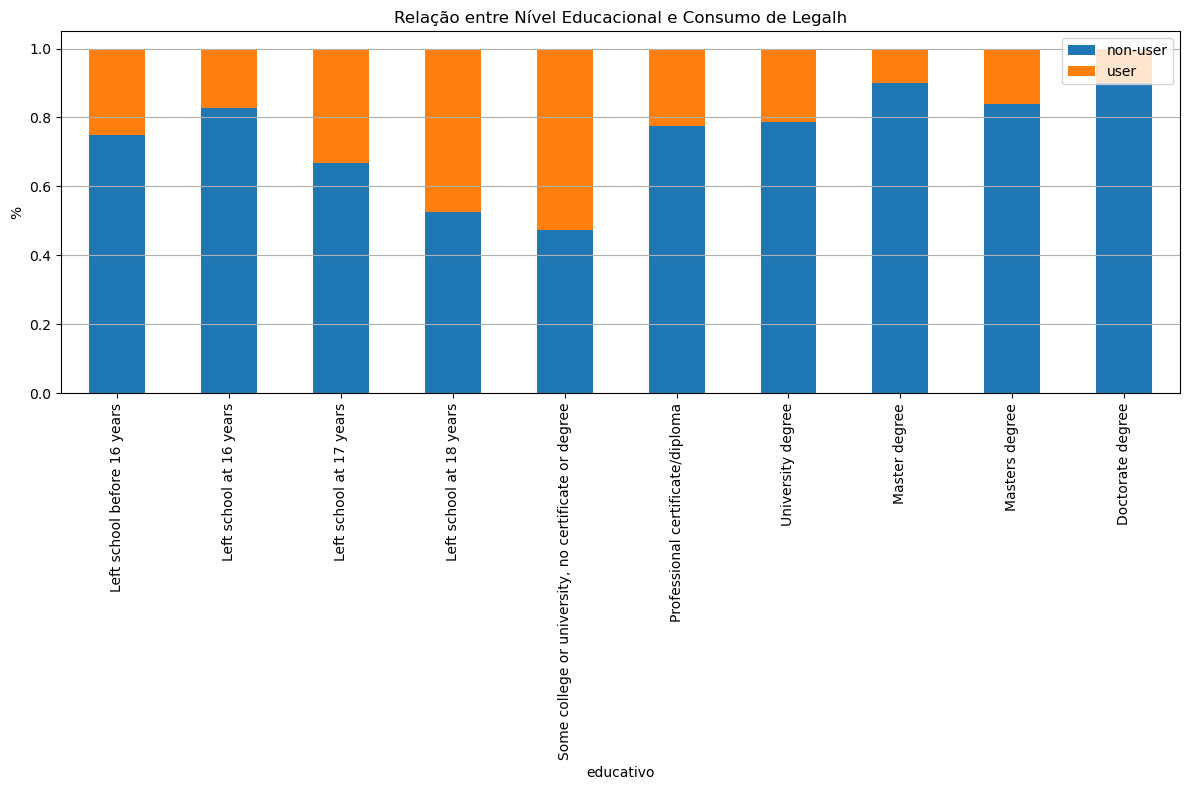

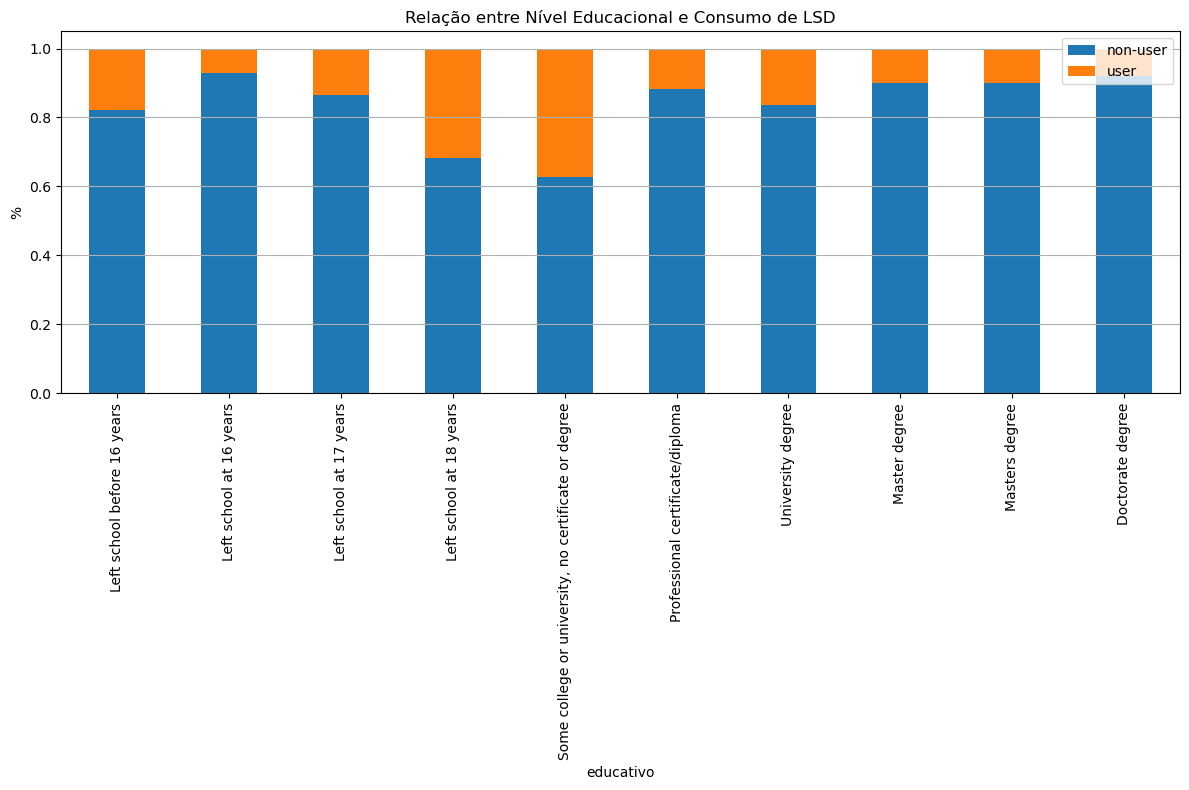

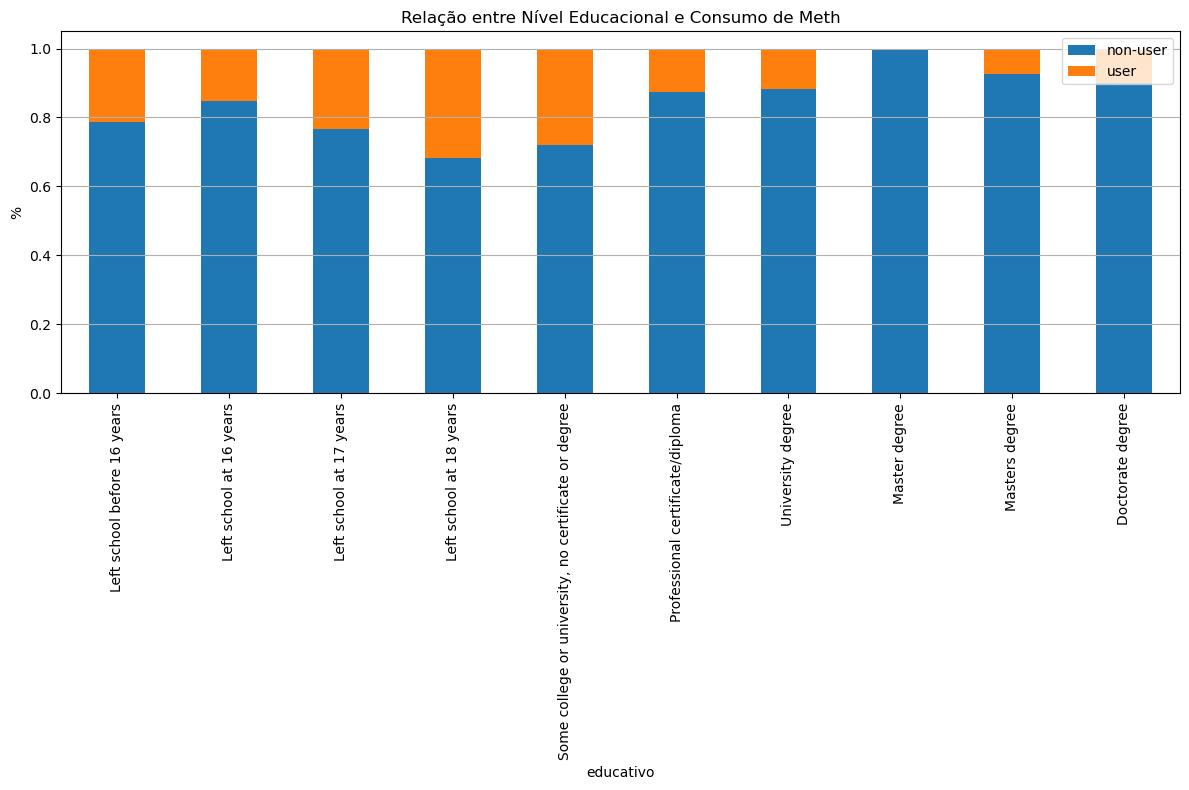

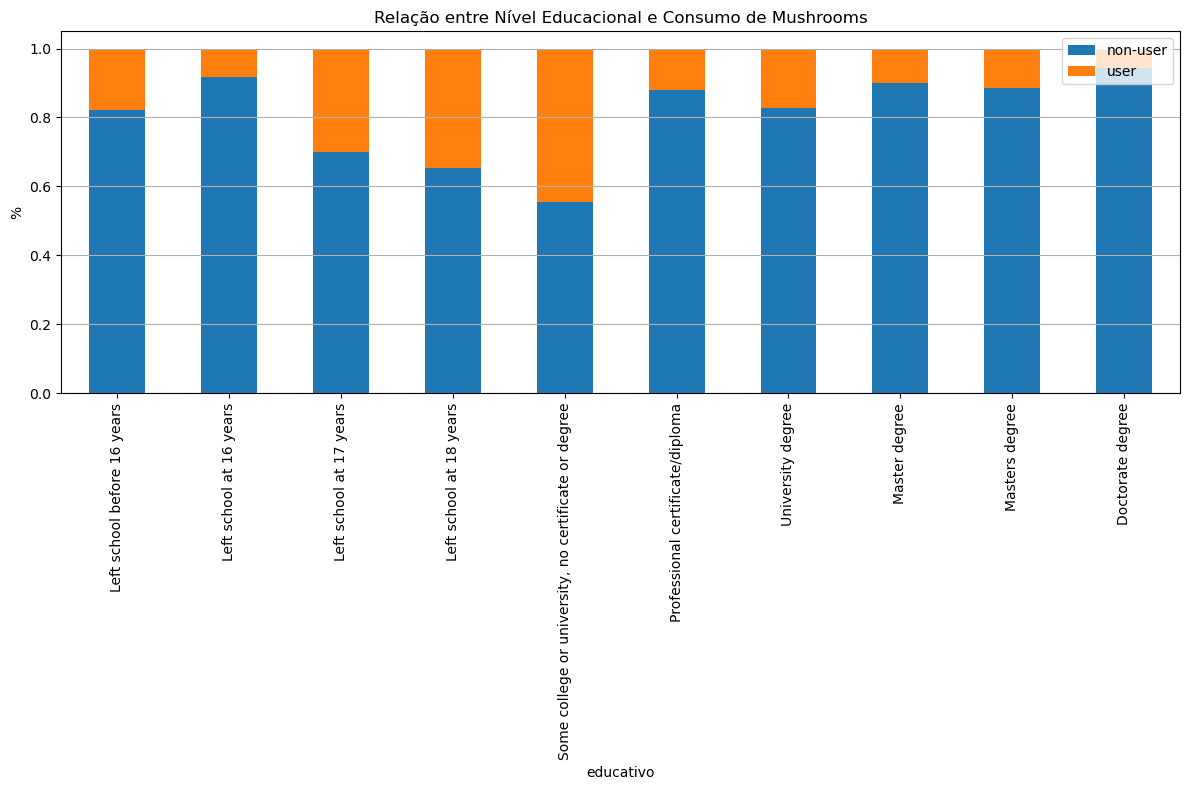

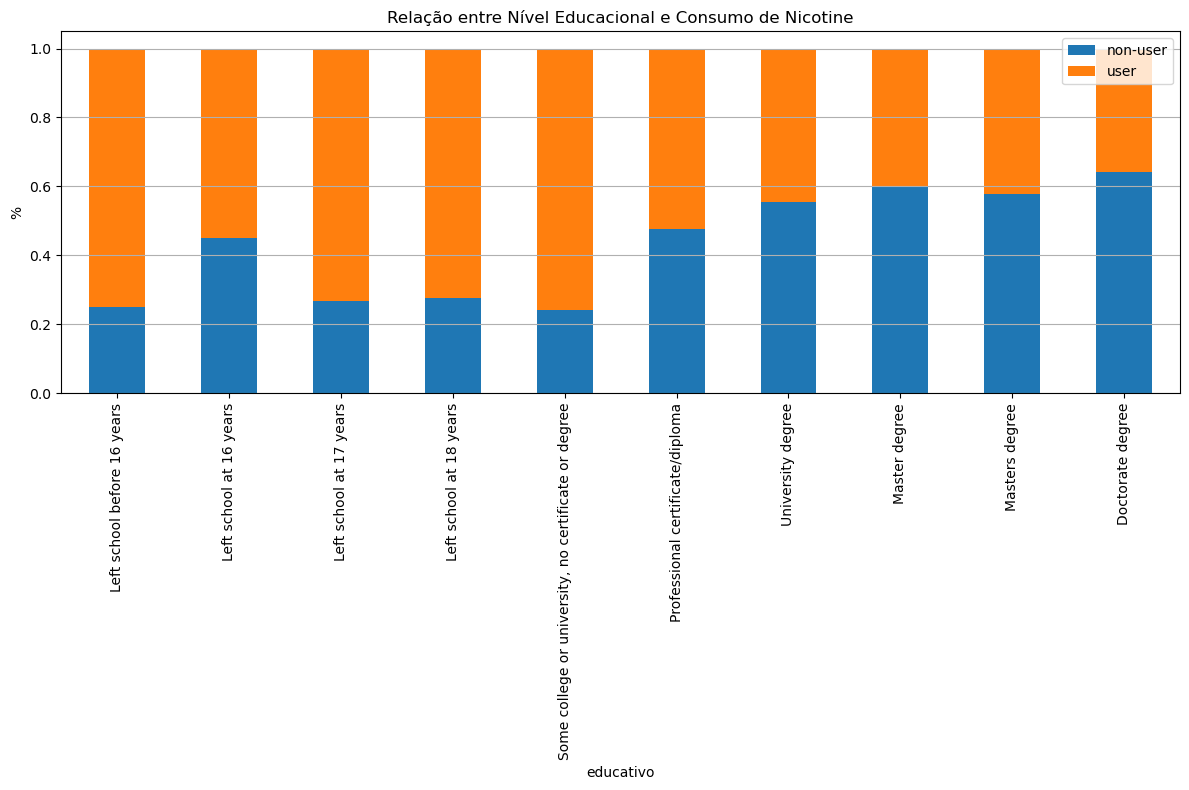

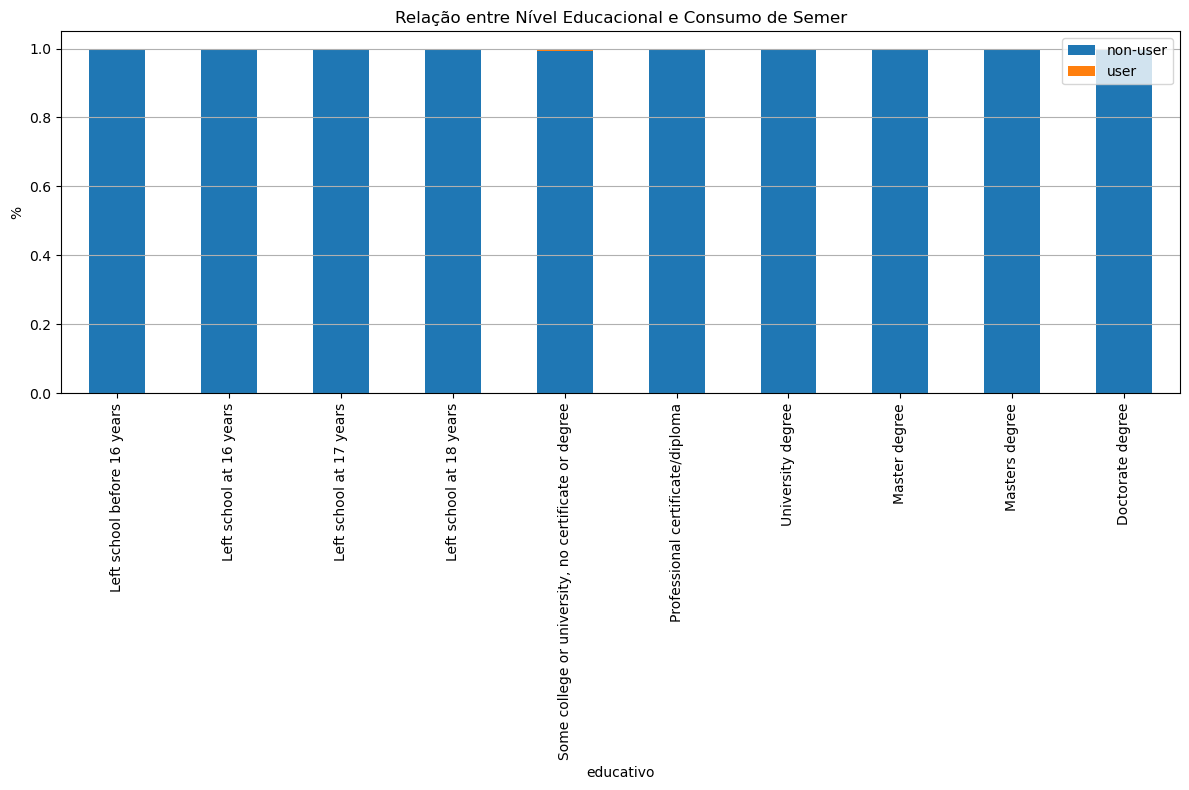

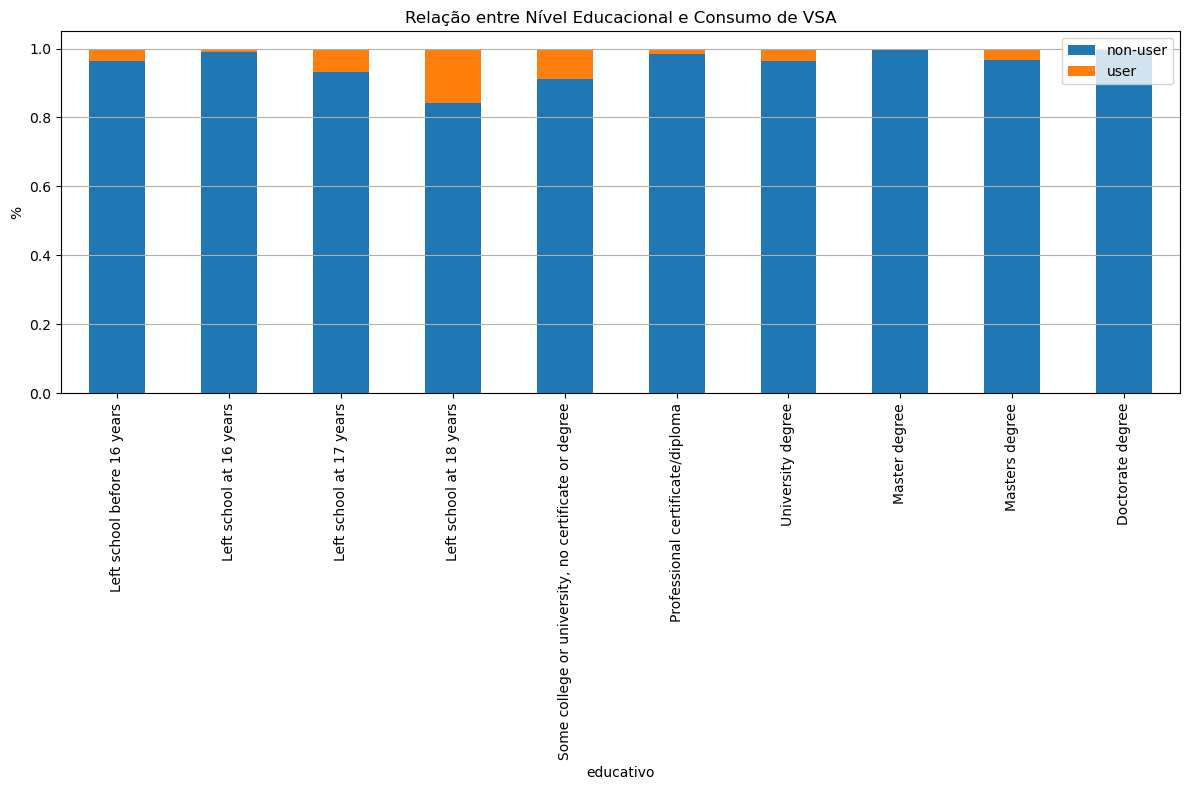

In [305]:
from scipy.stats import t

educativo_dic = {
    0: "Doctorate degree",
    1: "Left school at 16 years",
    2: "Left school at 17 years",
    3: "Left school at 18 years",
    4: "Left school before 16 years",
    5: "Master degree",
    6: "Masters degree",
    7: "Professional certificate/diploma",
    8: "Some college or university, no certificate or degree",
    9: "University degree"
}

edu_em_ordem = [
    "Left school before 16 years",
    "Left school at 16 years",
    "Left school at 17 years",
    "Left school at 18 years",
    "Some college or university, no certificate or degree",
    "Professional certificate/diploma",
    "University degree",
    "Master degree",
    "Masters degree",
    "Doctorate degree"
]

copia_tabela['educativo'] = copia_tabela['Education'].map(educativo_dic)

#função para categorizar todos os usuários em um DataFrame para uma substância
def categorize_users(df, drug):
    df[f'{drug}_User'] = df[drug].apply(categorize_user)

#aplicar a função para cada substância
for substance in drug_columns:
    categorize_users(copia_tabela, substance)

#função para comparar a distribuição educacional entre usuários e não-usuários

def compare_education_distribution(substance, df):
    users = df[df[f'{substance}_User'] == 'user']['educativo']
    non_users = df[df[f'{substance}_User'] == 'non-user']['educativo']
    return users, non_users

#analisar cada substância e imprimir os resultados

for substance in drug_columns:

    cross_tab = pd.crosstab(copia_tabela['educativo'], copia_tabela[f'{substance}_User']).reindex(edu_em_ordem)
    cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(12, 8))
    
    plt.title(f'Relação entre Nível Educacional e Consumo de {substance}')
    plt.ylabel('%')
    plt.legend(loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

4. Como o gênero influencia no consumo de drogas alucinógenas (LSD, Ecstasy, Ketamine, Cannabis e Mushrooms)? Explique.

Análise de LSD:
LSD_User  non-user  user
Gender                  
Female         836   102
Male           666   278


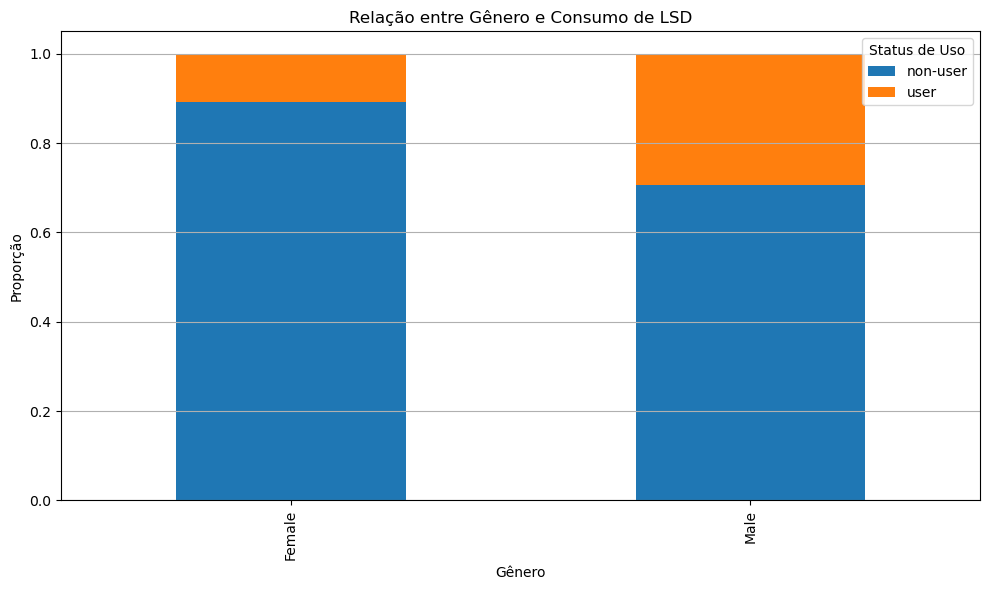

Análise de Ecstasy:
Ecstasy_User  non-user  user
Gender                      
Female             770   168
Male               595   349


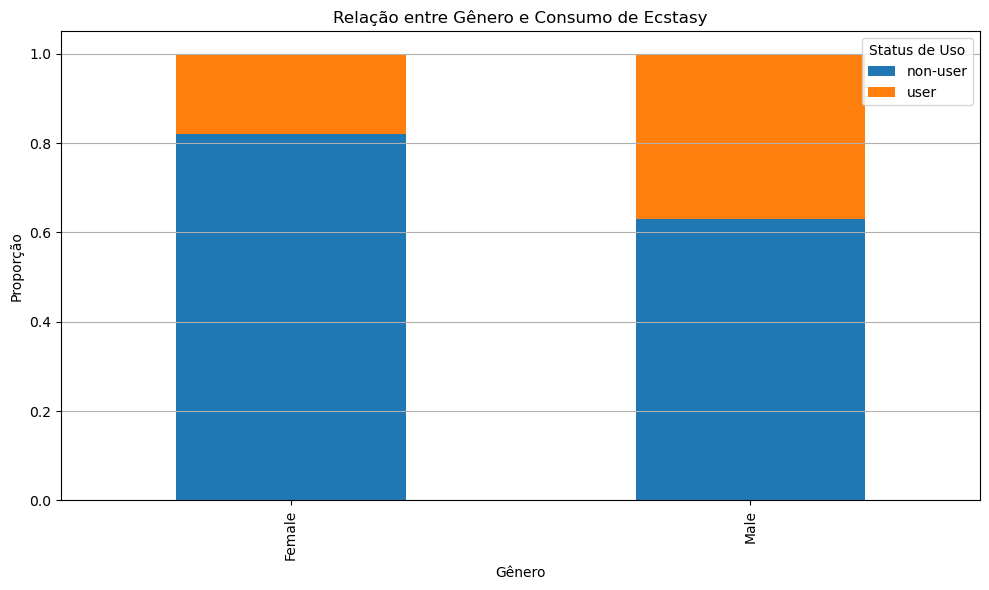

Análise de Ketamine:
Ketamine_User  non-user  user
Gender                       
Female              881    57
Male                793   151


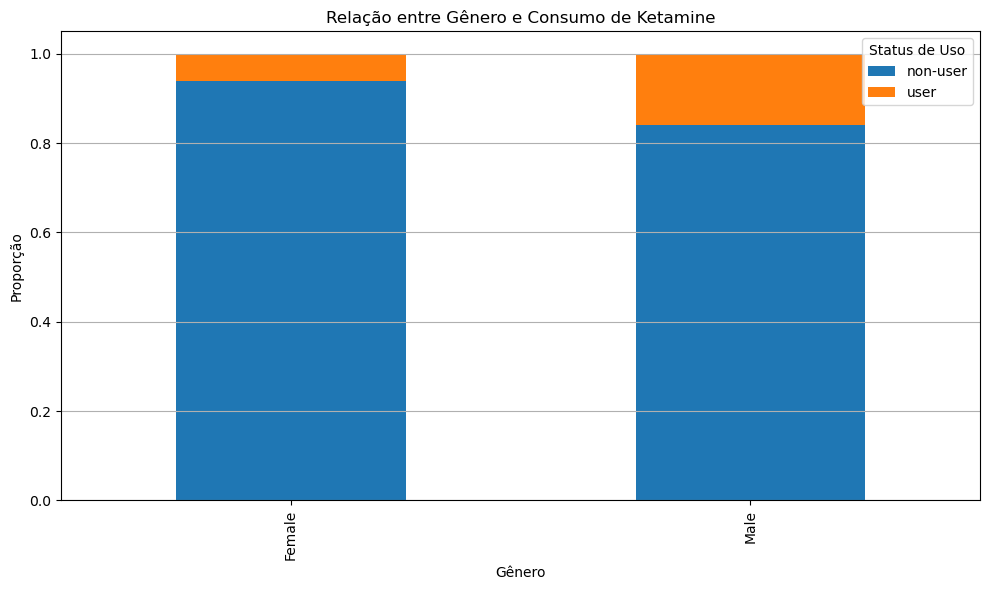

Análise de Cannabis:
Cannabis_User  non-user  user
Gender                       
Female              575   363
Male                308   636


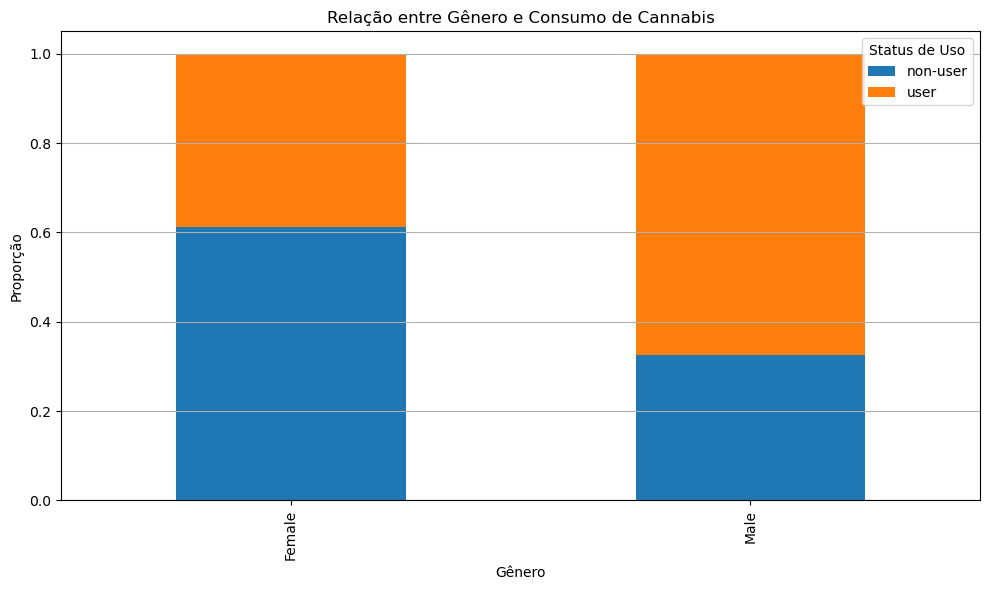

Análise de Mushrooms:
Mushrooms_User  non-user  user
Gender                        
Female               818   120
Male                 630   314


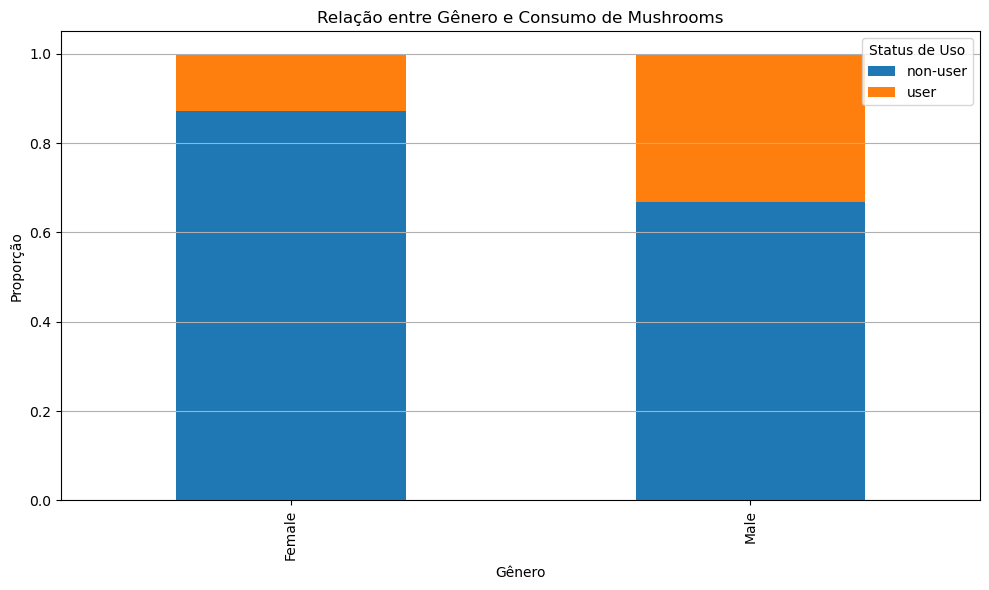

In [307]:
hallucinogens = ['LSD', 'Ecstasy', 'Ketamine', 'Cannabis', 'Mushrooms']

#função para categorizar todos os usuários em um DataFrame para uma substância
def categorize_users(tabela, drug):
    tabela[f'{drug}_User'] = tabela[drug].apply(categorize_user)

#aplicar a função para cada substância alucinógena
for substance in hallucinogens:
    categorize_users(copia_tabela, substance)

#função para analisar a relação entre gênero e consumo de drogas alucinógenas
def analyze_gender_relationship(df, substance):
    cross_tab = pd.crosstab(df['Gender'], df[f'{substance}_User'])
    return cross_tab

#analisar cada substância e imprimir os resultados
for substance in hallucinogens:
    
    cross_tab = analyze_gender_relationship(copia_tabela, substance)
    cross_tab.index = cross_tab.index.map({0: 'Female', 1: 'Male'})
    print(f"Análise de {substance}:")
    print(cross_tab)

    # Plotar a relação entre gênero e consumo de substâncias
    
    cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Relação entre Gênero e Consumo de {substance}')
    plt.xlabel('Gênero')
    plt.ylabel('Proporção')
    plt.legend(title='Status de Uso', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Conclusão: Creio que não dá pra se explicar esses dados com somente esses fatores que foram apresentados aqui, entretanto pelo o que se foi apresentado Homens consomem mais drogas.

5. Qual é a proporção de participantes que se auto-classificam como impulsivos (score superior a zero)? Existe uma correlação entre a impulsividade e o consumo de substâncias?

Análise de Alcohol:
Alcohol_User   non-user  user
impulsivos                   
Impulsivo            62   865
Não-impulsivo        74   881


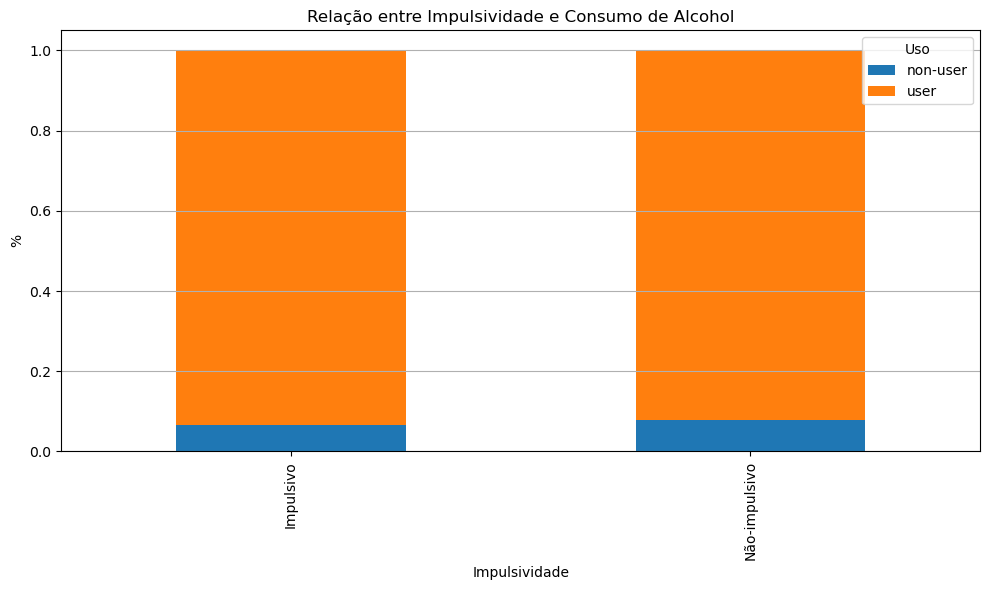

Análise de Amphet:
Amphet_User    non-user  user
impulsivos                   
Impulsivo           618   309
Não-impulsivo       828   127


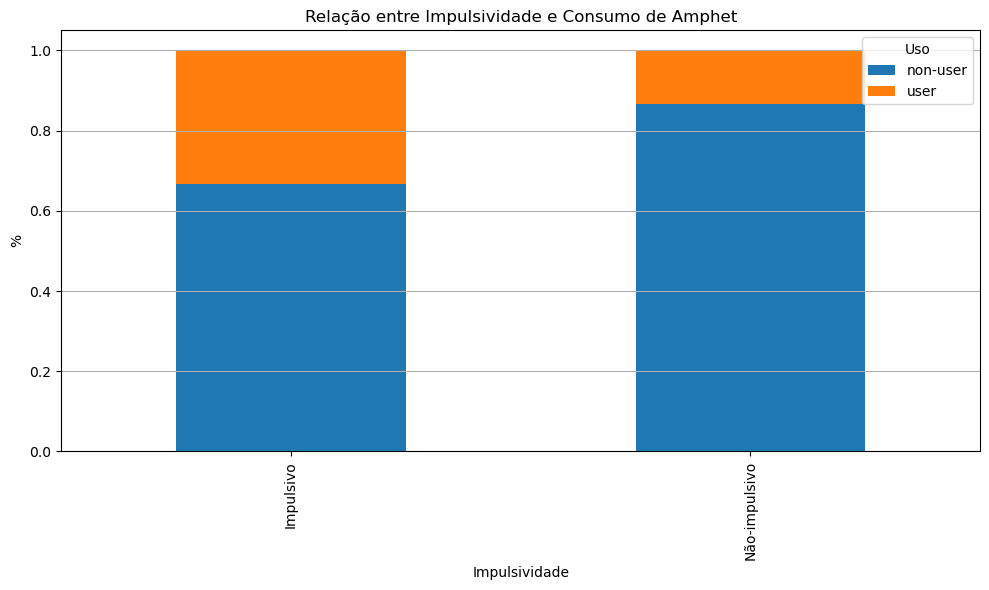

Análise de Amyl:
Amyl_User      non-user  user
impulsivos                   
Impulsivo           844    83
Não-impulsivo       905    50


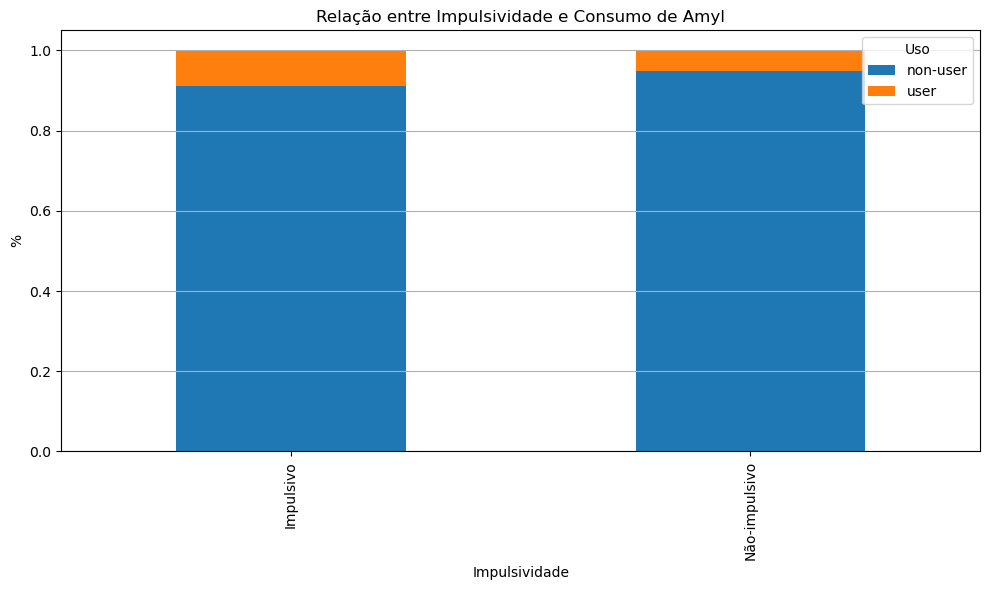

Análise de Benzos:
Benzos_User    non-user  user
impulsivos                   
Impulsivo           588   339
Não-impulsivo       759   196


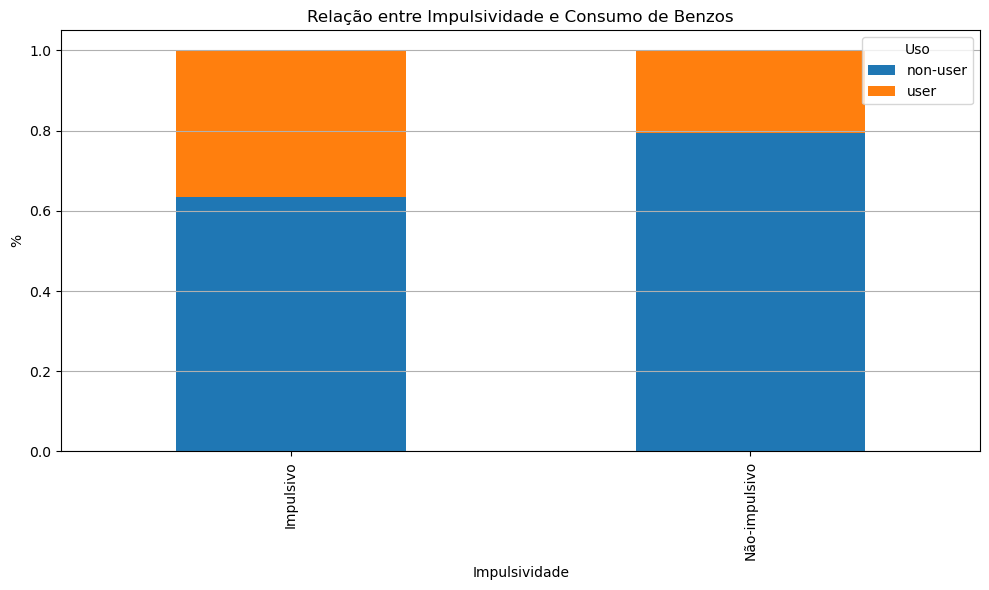

Análise de Caff:
Caff_User      non-user  user
impulsivos                   
Impulsivo            17   910
Não-impulsivo        44   911


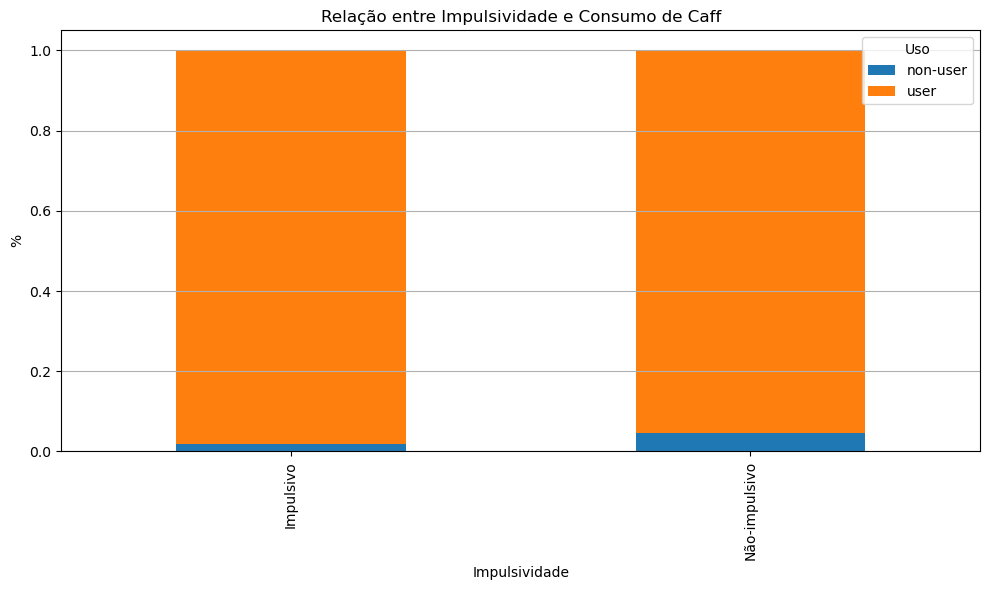

Análise de Cannabis:
Cannabis_User  non-user  user
impulsivos                   
Impulsivo           325   602
Não-impulsivo       558   397


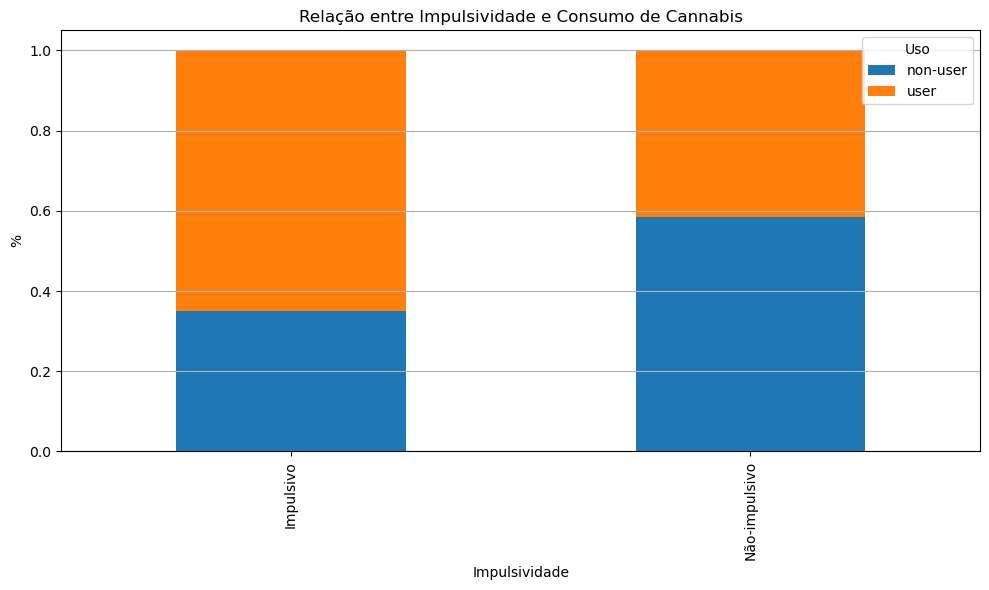

Análise de Choc:
Choc_User      non-user  user
impulsivos                   
Impulsivo            21   906
Não-impulsivo        24   931


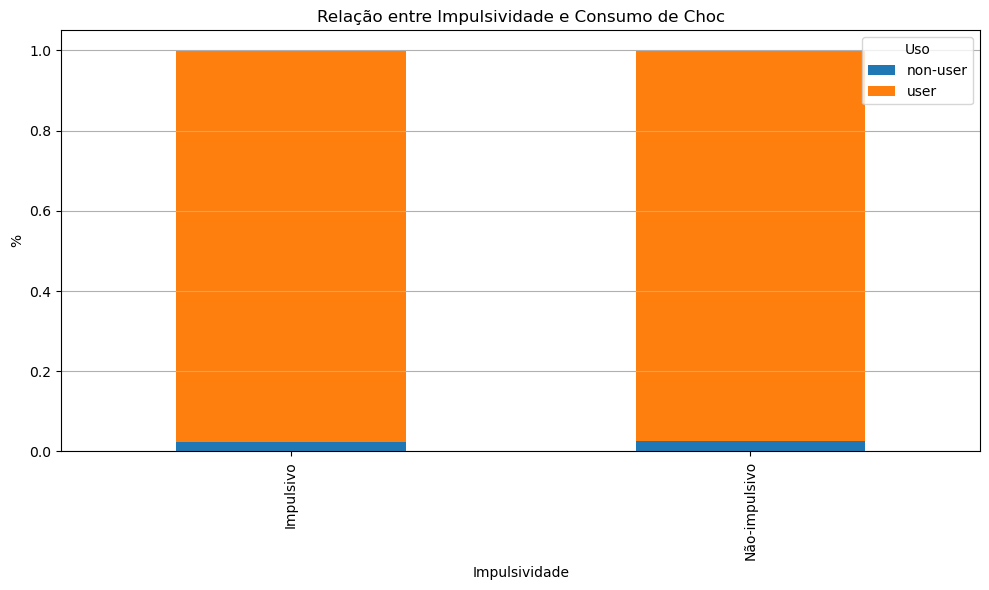

Análise de Coke:
Coke_User      non-user  user
impulsivos                   
Impulsivo           644   283
Não-impulsivo       821   134


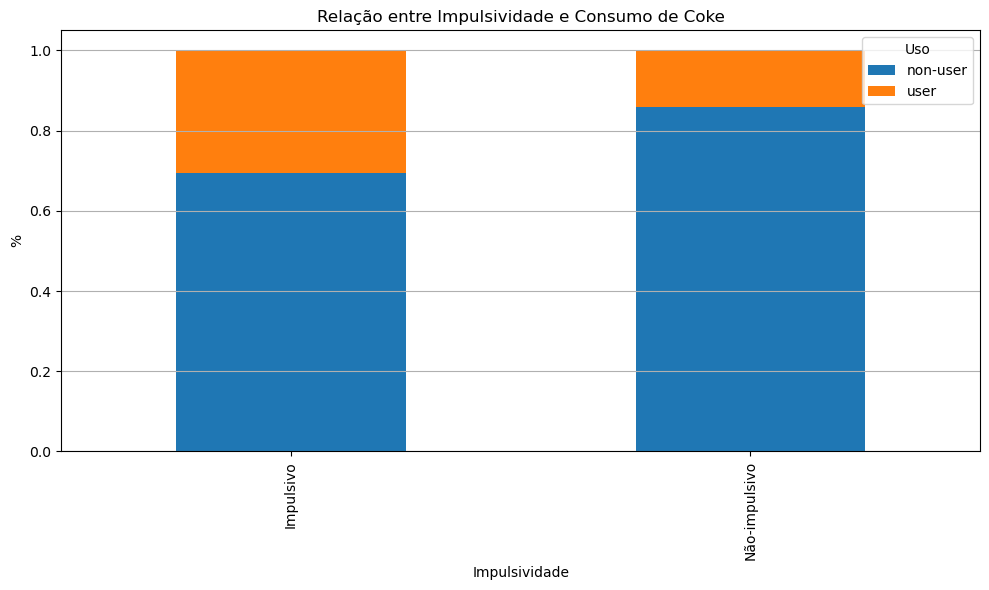

Análise de Crack:
Crack_User     non-user  user
impulsivos                   
Impulsivo           866    61
Não-impulsivo       937    18


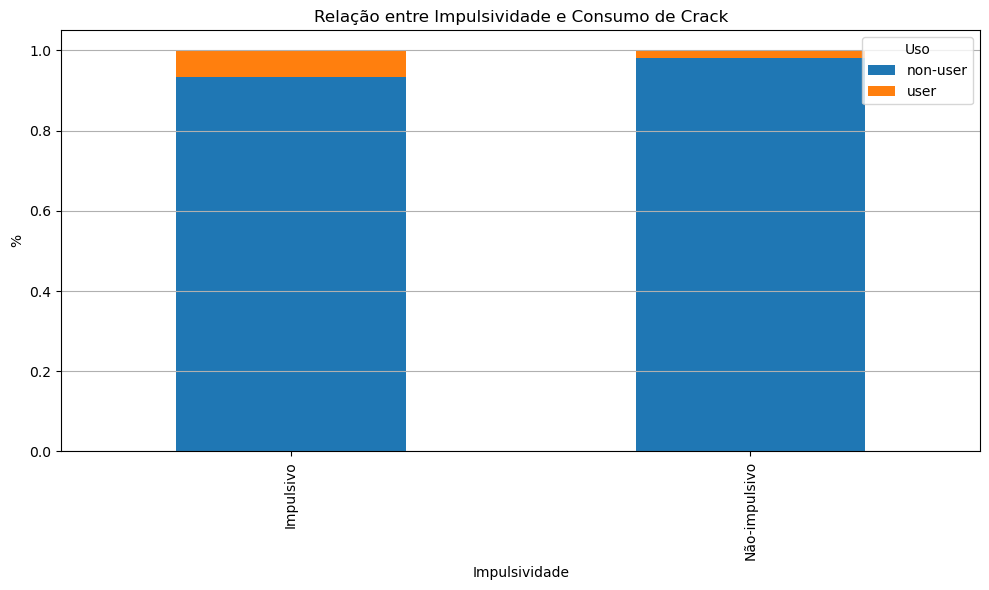

Análise de Ecstasy:
Ecstasy_User   non-user  user
impulsivos                   
Impulsivo           584   343
Não-impulsivo       781   174


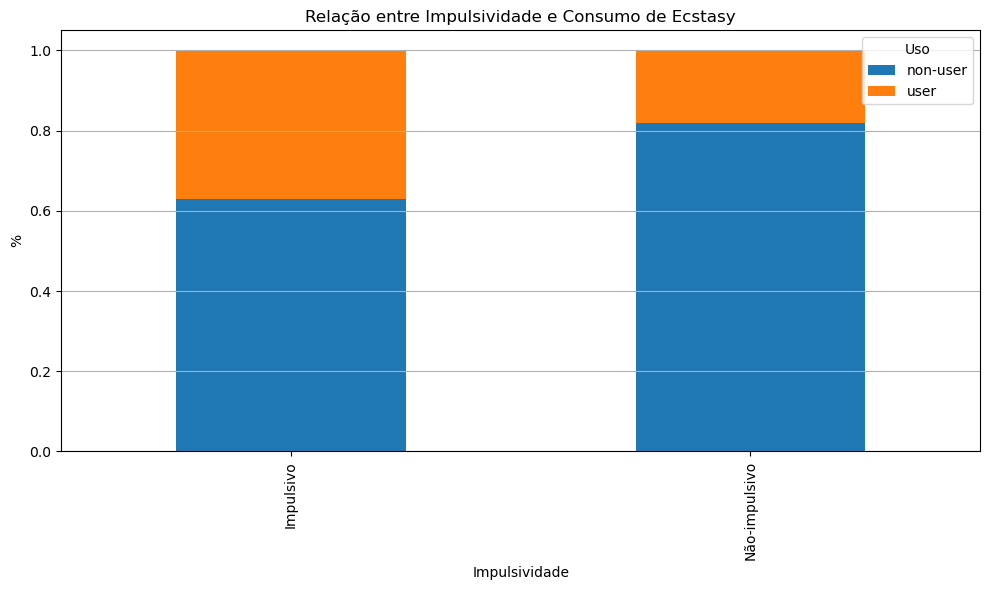

Análise de Heroin:
Heroin_User    non-user  user
impulsivos                   
Impulsivo           841    86
Não-impulsivo       923    32


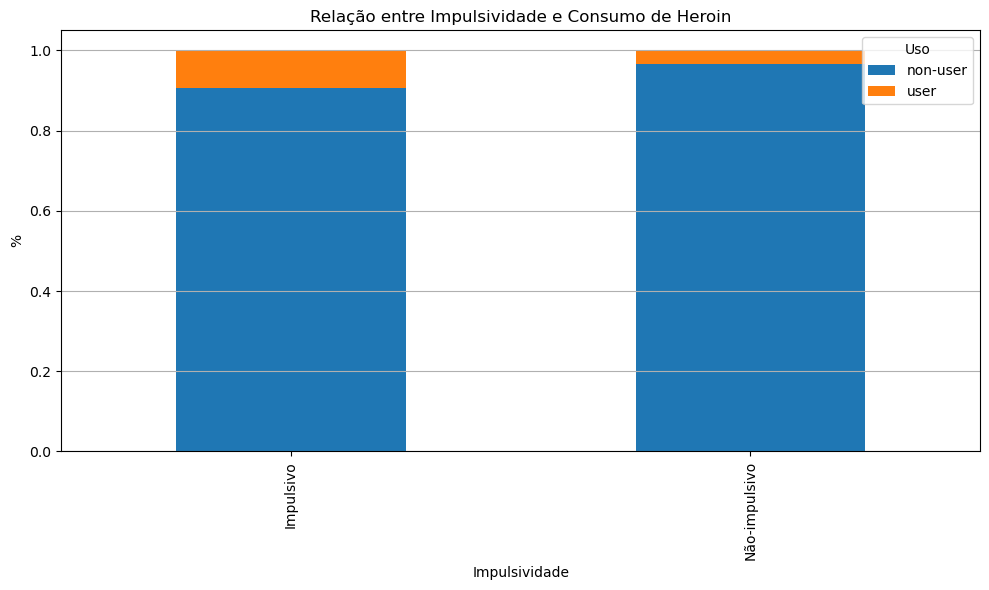

Análise de Ketamine:
Ketamine_User  non-user  user
impulsivos                   
Impulsivo           792   135
Não-impulsivo       882    73


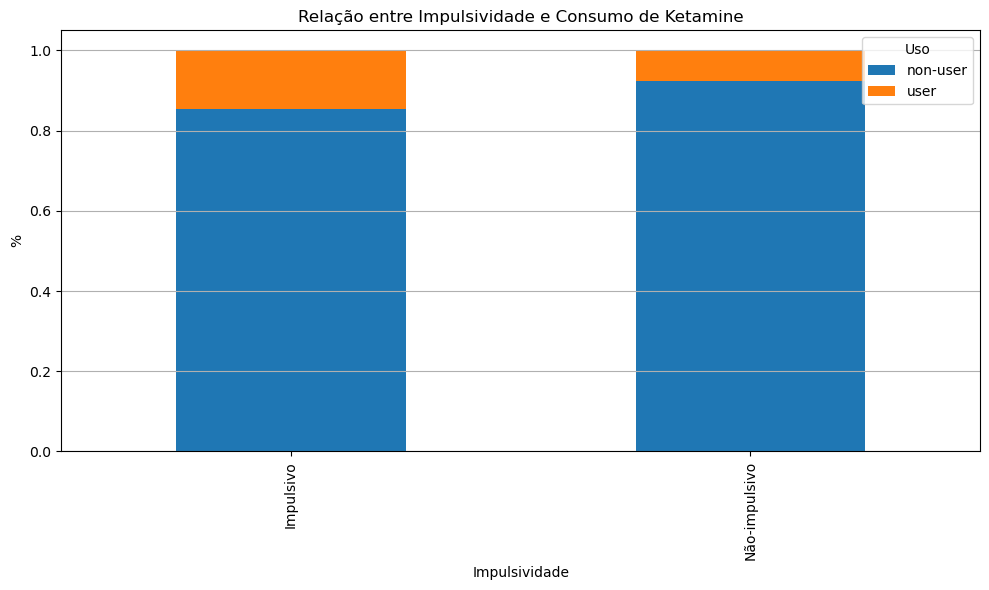

Análise de Legalh:
Legalh_User    non-user  user
impulsivos                   
Impulsivo           560   367
Não-impulsivo       758   197


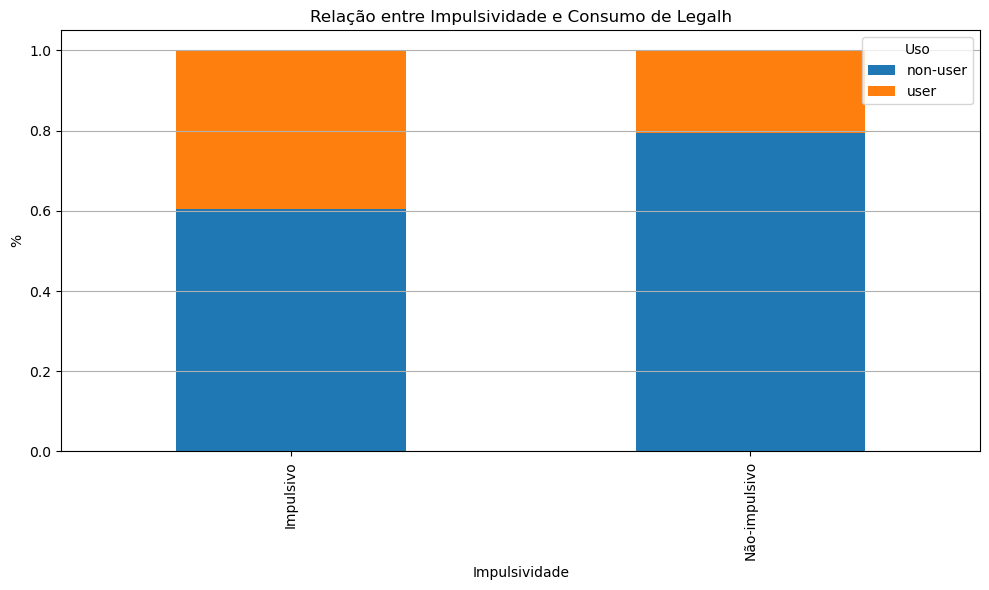

Análise de LSD:
LSD_User       non-user  user
impulsivos                   
Impulsivo           681   246
Não-impulsivo       821   134


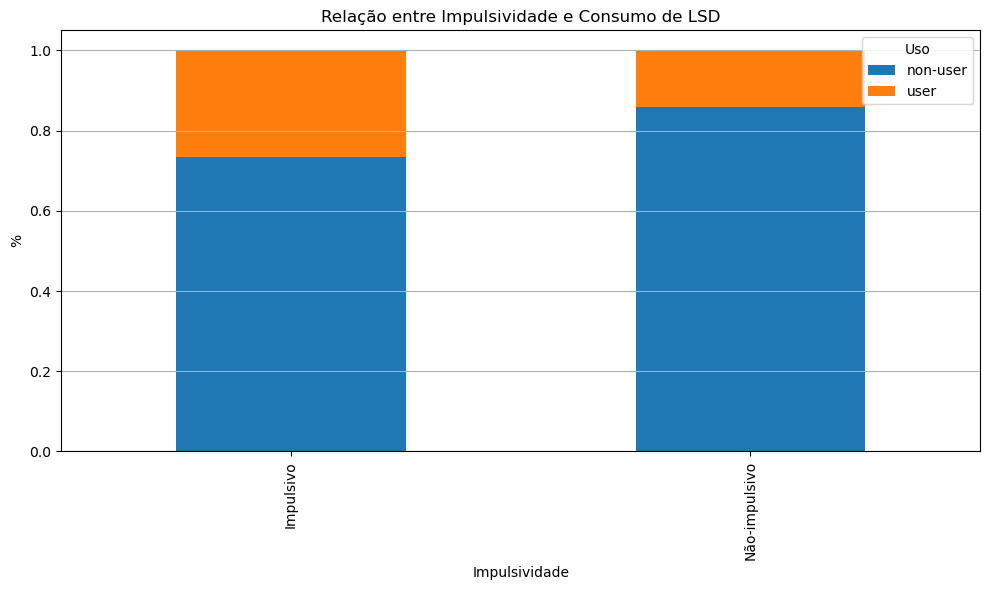

Análise de Meth:
Meth_User      non-user  user
impulsivos                   
Impulsivo           718   209
Não-impulsivo       844   111


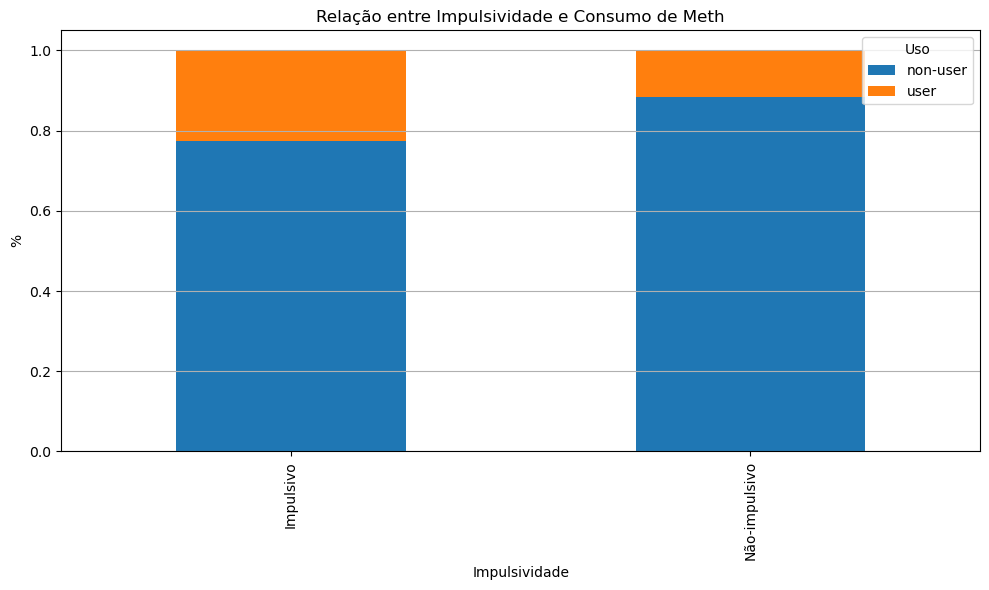

Análise de Mushrooms:
Mushrooms_User  non-user  user
impulsivos                    
Impulsivo            640   287
Não-impulsivo        808   147


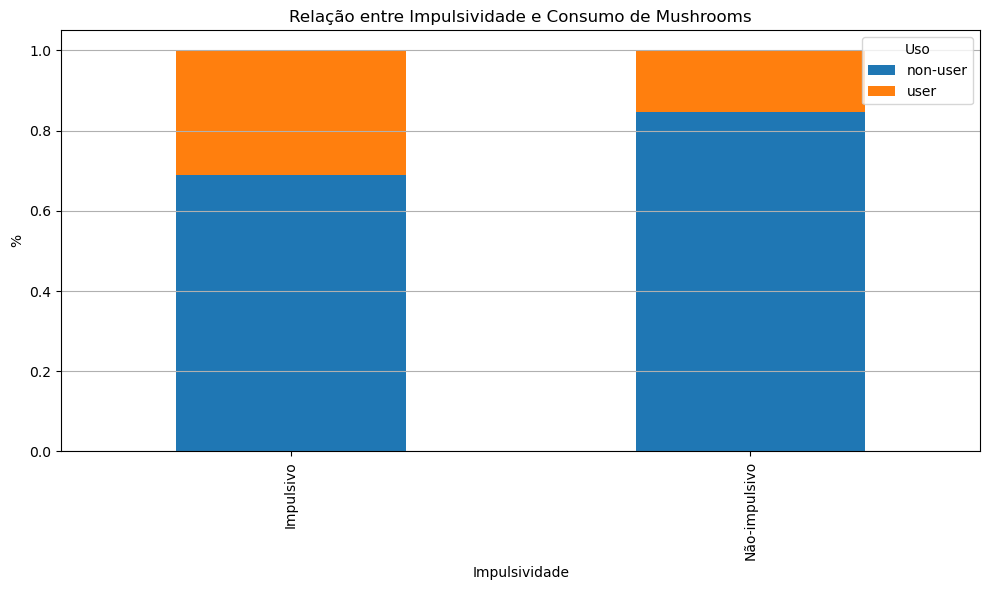

Análise de Nicotine:
Nicotine_User  non-user  user
impulsivos                   
Impulsivo           311   616
Não-impulsivo       512   443


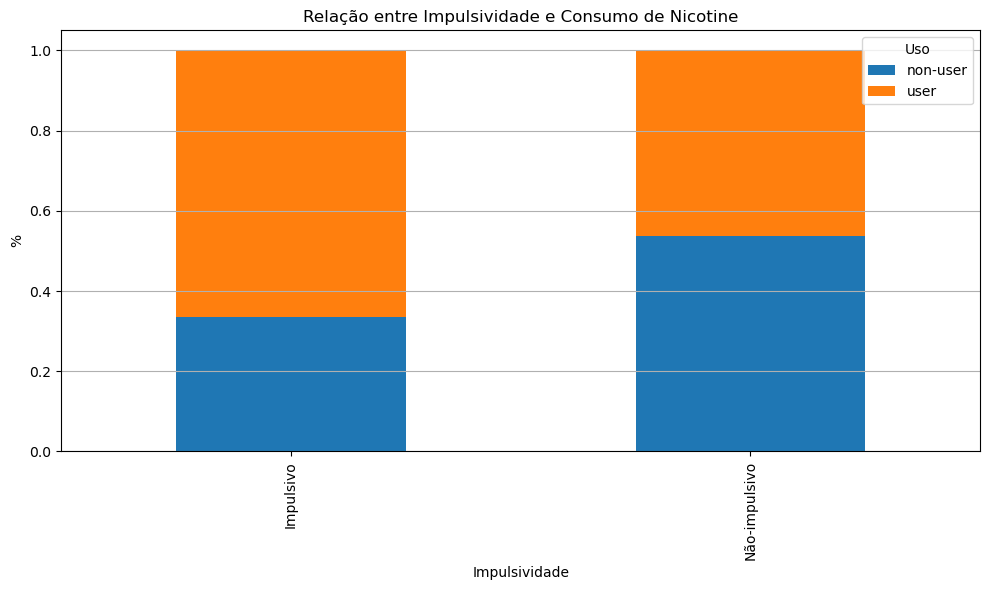

Análise de Semer:
Semer_User     non-user  user
impulsivos                   
Impulsivo           926     1
Não-impulsivo       953     2


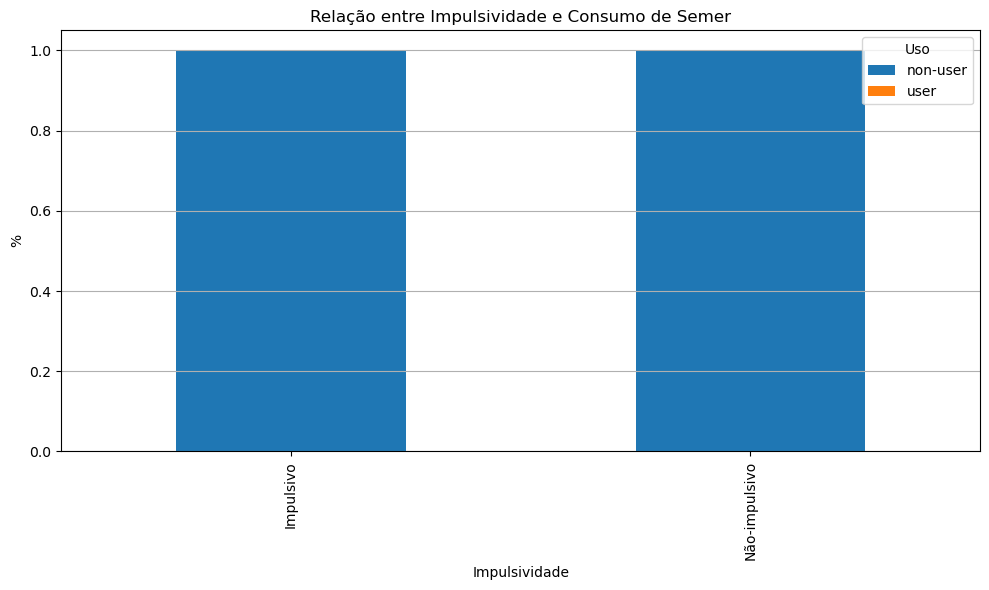

Análise de VSA:
VSA_User       non-user  user
impulsivos                   
Impulsivo           859    68
Não-impulsivo       928    27


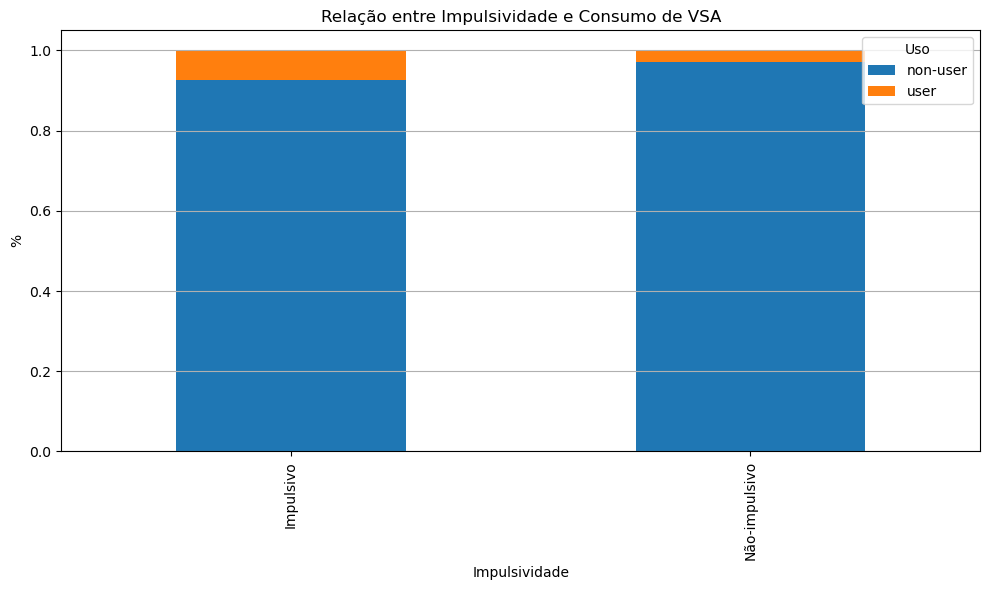

In [314]:
copia_tabela['impulsivos'] = copia_tabela['Impulsive'].apply(lambda x: 'Impulsivo' if x > 0 else 'Não-impulsivo')

def categorize_users(df, drug):
    
    df[f'{drug}_User'] = df[drug].apply(categorize_user)

def pessoas_impulsivas(tabela, substance):
    
    cross_tab = pd.crosstab(tabela['impulsivos'], tabela[f'{substance}_User'])
    
    return cross_tab

for substance in drug_columns:
    
    categorize_users(copia_tabela, substance)

for substance in drug_columns:
    
    cross_tab = pessoas_impulsivas(copia_tabela, substance)
    print(f"Análise de {substance}:")
    print(cross_tab)

    cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Relação entre Impulsividade e Consumo de {substance}')
    plt.xlabel('Impulsividade')
    plt.ylabel('%')
    plt.legend(title='Uso', loc='upper right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



Dá pra ver que pessoas impulsivas tendem consumir mais drogas, especialmente quando se trata de LSD, BENZOS, AMPHET, COGUMELOS, NICOTINA, LEGALH, KETAMINE E ECTASY 

In [318]:
#dá até pra ver

correlacao = {}

for substance in drug_columns:
    #usado pra calcular correlation :D
    correlacao[substance] = copia_tabela['Impulsive'].corr(copia_tabela[substance])

print("Impulsividade X Consumo de substâncias:")

for substance, corr in correlations.items():
    print(f"{substance}: {corr:.2f}")

Impulsividade X Consumo de substâncias:
Alcohol: 0.04
Amphet: 0.29
Amyl: 0.13
Benzos: 0.22
Caff: 0.05
Cannabis: 0.31
Choc: -0.02
Coke: 0.26
Crack: 0.19
Ecstasy: 0.26
Heroin: 0.20
Ketamine: 0.18
Legalh: 0.27
LSD: 0.23
Meth: 0.18
Mushrooms: 0.26
Nicotine: 0.25
Semer: 0.01
VSA: 0.18


6. Classifique as variáveis entre qualitativas (ordinal ou nominal), ou quantitativas (discreta, contínuas).

1. Variáveis Qualitativas Nominais: São categóricas e não têm uma ordem intrínseca.

- Country
- Gender
- Ethnicity

2. Variáveis Qualitativas Ordinais: São categóricas, mas têm uma ordem natural.

- Age
- Education

3. Variáveis Quantitativas Discretas: São numéricas e contáveis em unidades discretas.

- Impulsive
- Ser usuário da droga (cl1, cl2, cl3, ...)

4. Variáveis Quantitativas Contínuas: São numéricas e podem assumir qualquer valor em um intervalo contínuo.

- Income (USD)


7. Qual é a proporção de consumo de substâncias legais versus ilícitas na amostra (considere a definição de legalidade segundo a legislação
brasileira)?

Considerando a decisão recente do STF, 

Lícitas 

In [321]:
legais_lista = ['Alcohol', 'Caff', 'Nicotine', 'Choc', 'Cannabis', 'Mushrooms', 'Ketamine', 'Benzos','Amphet','Legalh']
ilegais_lista = ['Amyl', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Meth', 'Semer', 'VSA']

#aplicar categorização para substâncias legais e ilícitas
for substance in legal_substances + illegal_substances:
    copia_tabela[f'{substance}_User'] = copia_tabela[substance].apply(categorize_user)

#função para calcular a proporção de usuários

def calculate_proportion(tabela, substances):
    
    user_counts = tabela[[f'{substance}_User' for substance in substances]].apply(lambda row: 'user' in row.values, axis=1).sum()
    
    return user_counts / tabela.shape[0]

# Calcular proporções

legais = calculate_proportion(copia_tabela, legais_lista)
ilegais = calculate_proportion(copia_tabela, ilegais_lista)

print(f"Proporção de consumo de substâncias legais: {legais:.2%}")
print(f"Proporção de consumo de substâncias ilícitas: {ilegais:.2%}")

Proporção de consumo de substâncias legais: 99.84%
Proporção de consumo de substâncias ilícitas: 44.31%


8. Quais fatores predizem a probabilidade de um indivíduo consumir crack(Crack)?

Eu acho que essa questão seria bem complementada com uma matriz de confusão mas devido a complexidade tive problemas, para determinar se uma pessoa tem ou não uma prbabidade de consumir outra drogas ou cracks, deve-se considerar:

Gender (foi possível observar que homens tendem a consumir mais drogas), Age (pessoas mais novas tendem a ter consumir mais drogas), Country (pessoas em países com políticas anti-drogas ou com carteis muito fortes tendem a utilizar mais drogas), Education (quanto maior o nível educacional tendem a reduzir o consumo de drogas ilícitas), Psicológicos: Impulsividade (Impulsive) (foi demonstrado como impulsividade é maior a chance do consumo de drogas) e por fim o Consumo de outras substâncias Ilícitas geralmente faz com que pessoas.

9. Qual é a média das pontuações Nscore, Escore, Oscore, AScore, Cscore? Calcule a correlação entre elas.

In [347]:
mean_scores = copia_tabela[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']].mean()
print("Média das Pontuações:")
print(mean_scores)

# Calcular a correlação entre as pontuações
correlation_matrix = copia_tabela[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']].corr()
print()

print("Correlação entre as Pontuações:")
print(correlation_matrix)

Média das Pontuações:
Nscore   -0.001305
Escore    0.000434
Oscore    0.002106
AScore   -0.000959
Cscore   -0.001630
dtype: float64

Correlação entre as Pontuações:
          Nscore    Escore    Oscore    AScore    Cscore
Nscore  1.000000 -0.430577  0.011855 -0.217035 -0.390458
Escore -0.430577  1.000000  0.244351  0.158404  0.308911
Oscore  0.011855  0.244351  1.000000  0.040426 -0.058386
AScore -0.217035  0.158404  0.040426  1.000000  0.249885
Cscore -0.390458  0.308911 -0.058386  0.249885  1.000000


10. Analise a relação entre o nível de educação (Education) e o consumo de diferentes substâncias ilícitas (como LSD, Amphet, Cannabis, etc.). Identifique se há uma correlação significativa entre essas variáveis e, em caso afirmativo, explore a natureza dessa correlação (positiva/negativa).

In [370]:
data4 = 'Drugs4.csv'
data4 = pd.read_csv(data4)

for substance in ilegais_lista:
    data4[f'{substance}_User'] = data4[substance].apply(lambda x: 1 if x >= 4 else 0)

#transforma em dummy
data4 = pd.get_dummies(data4, columns=['Education'], drop_first=True)

# Identificar colunas de educação após a conversão para dummy p/ regressão linear
education_columns = [col for col in data4.columns if 'Education_' in col]

#calcular a correlação entre nível de educação e consumo de substâncias ilícitas
correlation_matrix = data4[education_columns + [f'{substance}_User' for substance in ilegais_lista]].corr()

#filtra as correlações significativas
corr = correlation_matrix.loc[education_columns, [f'{substance}_User' for substance in ilegais_lista]]

#mostra correlações significativas
print("Correlação entre Nível de Educação e Consumo de Substâncias Ilícitas:")

print(corr)



Correlação entre Nível de Educação e Consumo de Substâncias Ilícitas:
               Amphet_User  Amyl_User  Coke_User  Crack_User  Ecstasy_User  \
Education_1.0    -0.043596  -0.017935  -0.038595    0.022522     -0.063790   
Education_2.0     0.020649  -0.001969   0.024069    0.036839     -0.002251   
Education_3.0     0.070487   0.026369   0.009270    0.091267      0.075364   
Education_4.0    -0.005027  -0.016744  -0.012689    0.018062     -0.006762   
Education_5.0    -0.022787  -0.020144  -0.021373   -0.015291      0.004165   
Education_6.0    -0.119407  -0.019711  -0.075004   -0.063820     -0.105390   
Education_7.0    -0.072264  -0.017379  -0.023245   -0.032175     -0.076913   
Education_8.0     0.253123   0.053015   0.162148    0.076613      0.248044   
Education_9.0    -0.089964   0.000460  -0.056635   -0.061620     -0.086799   

               Heroin_User  Legalh_User  LSD_User  Meth_User  Semer_User  \
Education_1.0    -0.011259    -0.064481 -0.076116  -0.010531   -0.009360 

11. Treine uma árvore de decisão para prever se um indivíduo consome uma determinada substância (por exemplo, álcool, anfetaminas, cannabis) com base em suas características demográficas e pontuações de
personalidade. Utilize a acurácia para avaliar os seus resultados.

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data4 = 'Drugs4.csv'
data4 = pd.read_csv(data4)

features = ['Gender', 'Age', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive'] 

# TESTAR SE ELE CONSOME CHOCOLATE
data4['Choc_User'] = data4['Choc'].apply(lambda x: 1 if x >= 4 else 0)

#classificando os dados e features
X = data4[features]
y = data4['Choc_User'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dont ask me about these paramethers :C 

#treinamento
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#predição
y_pred = clf.predict(X_test)

#acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

#resultado :D
print(classification_report(y_test, y_pred))


Acurácia: 0.96
              precision    recall  f1-score   support

           0       0.07      0.09      0.08        11
           1       0.98      0.97      0.98       554

    accuracy                           0.96       565
   macro avg       0.52      0.53      0.53       565
weighted avg       0.96      0.96      0.96       565



12. Explore a correlação entre a idade (variável Age) e a experimentação de diferentes substâncias ilícitas. Verifique se há uma tendência de aumento ou diminuição do consumo conforme a idade avança.

Correlação entre Idade e Consumo de Substâncias Ilícitas:
Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


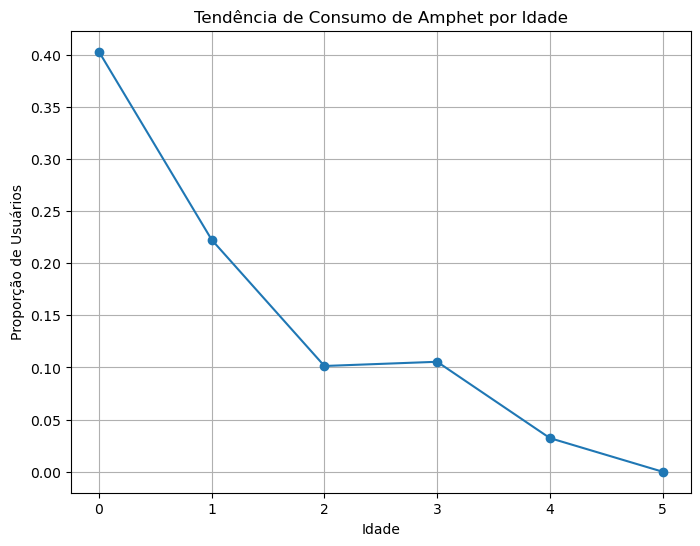

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


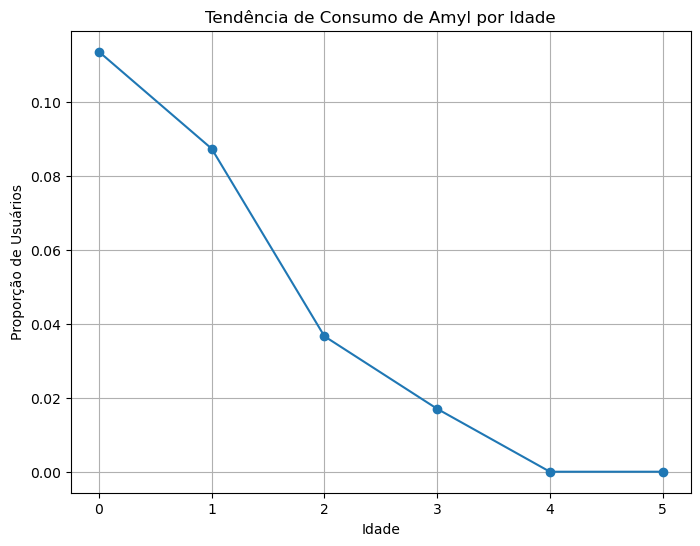

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


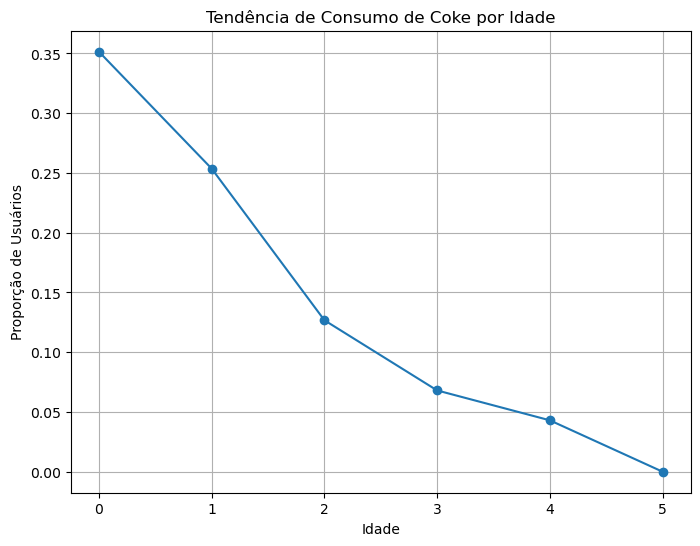

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


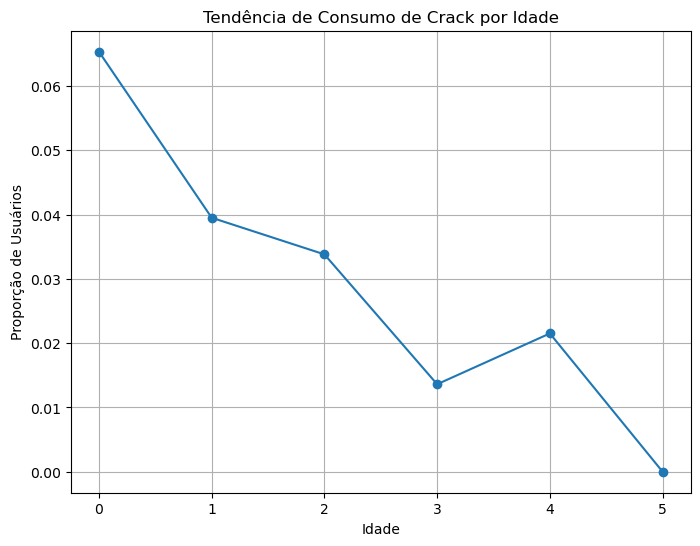

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


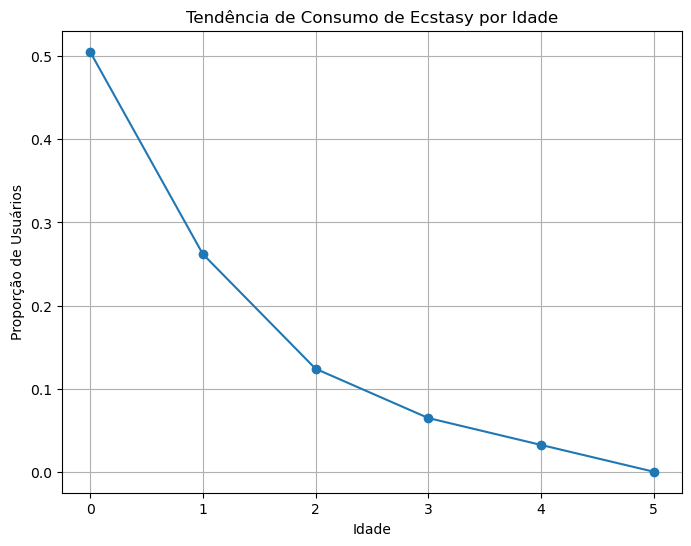

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


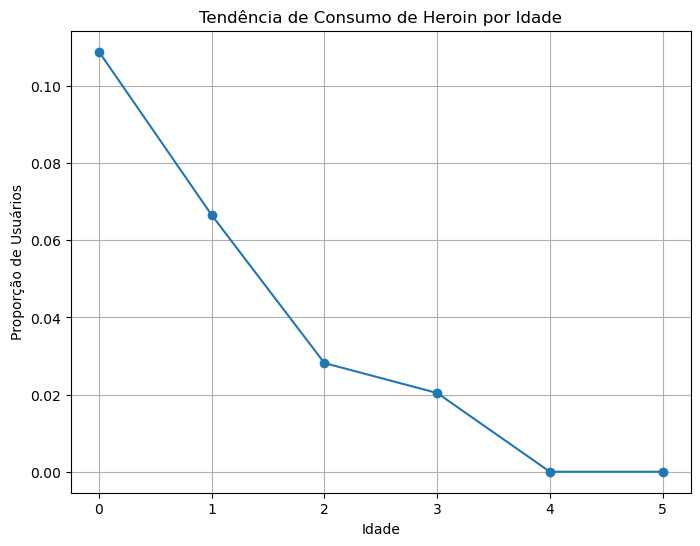

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


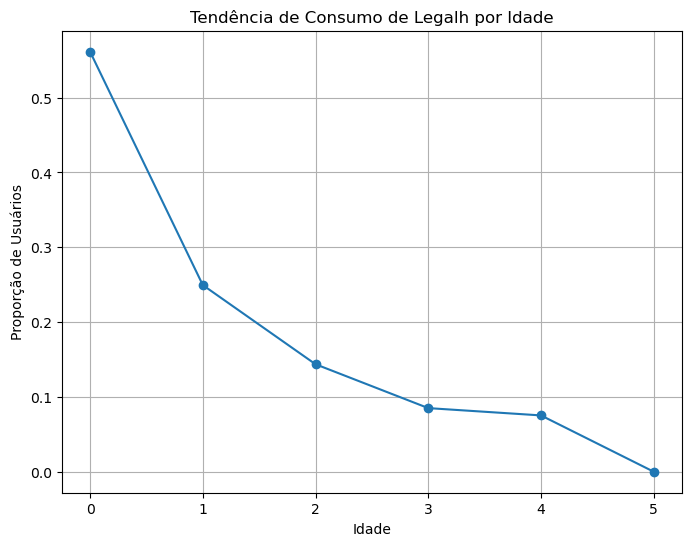

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


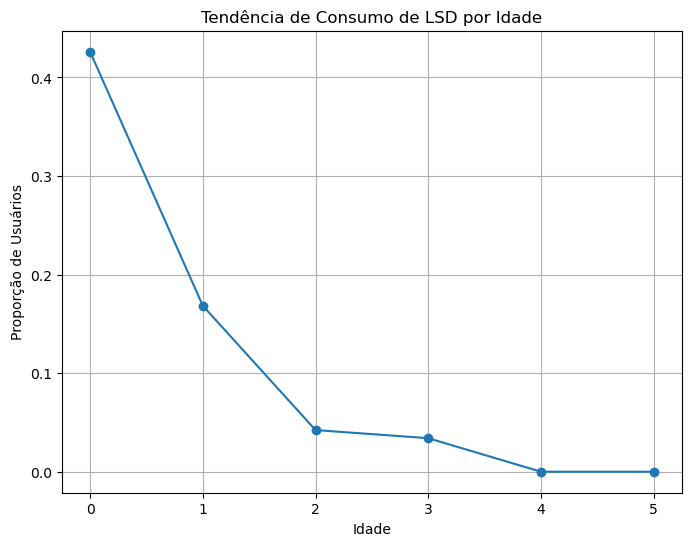

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


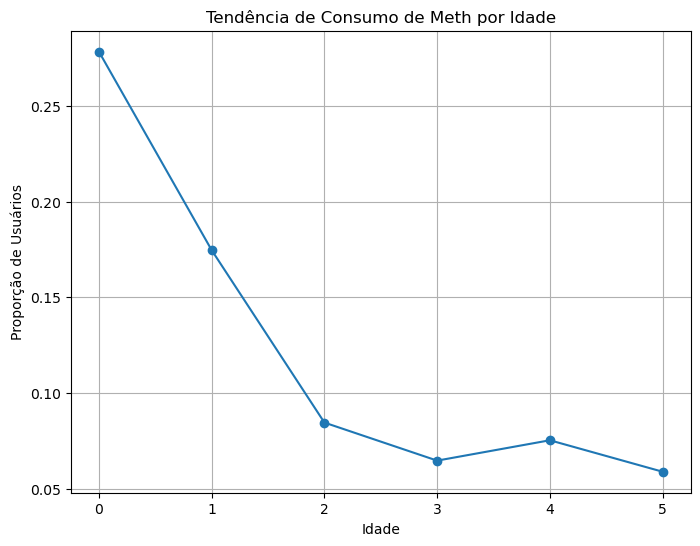

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


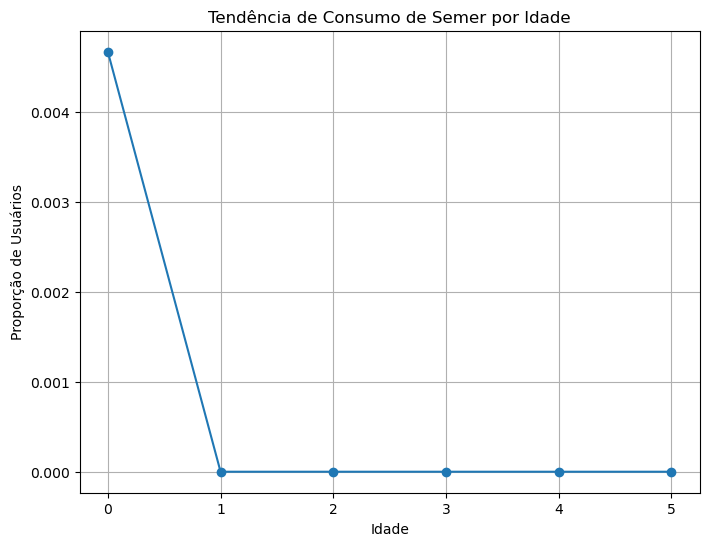

Code: 0, Age: 18-24
Code: 1, Age: 25-34
Code: 2, Age: 35-44
Code: 3, Age: 45-54
Code: 4, Age: 55-64
Code: 5, Age: 65+


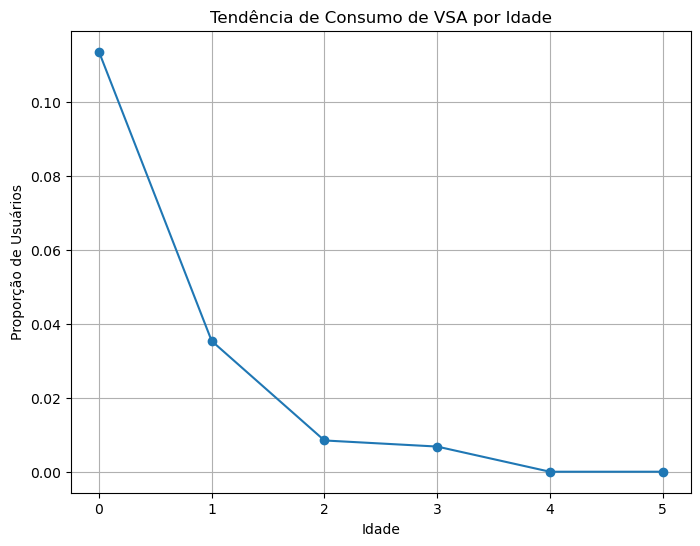

In [389]:
data4 = 'Drugs4.csv'
data4 = pd.read_csv(data4)

for substance in ilegais_lista:
    data4[f'{substance}_User'] = data4[substance].apply(lambda x: 1 if x >= 4 else 0)

#correlação entre idade e consumo de substâncias ilícitas
correlation_matrix = data4[['Age'] + [f'{substance}_User' for substance in ilegais_lista]].corr()

print("Correlação entre Idade e Consumo de Substâncias Ilícitas:")

# Visualizar as tendências
for substance in ilegais_lista:

    for i in range(len(idades)):
        print(f"Code: {i}, Age: {idades[i]}")
    
    plt.figure(figsize=(8, 6))
    data4.groupby('Age')[f'{substance}_User'].mean().plot(kind='line', marker='o')
    plt.title(f'Tendência de Consumo de {substance} por Idade')
    plt.xlabel('Idade')
    plt.ylabel('Proporção de Usuários')
    plt.grid(True)
    plt.show()

13. Quais são as 3 drogas mais utilizadas para cada país presente na
amostra? E quais são as 3 menos utilizadas?

In [413]:
data = 'Drugs4.csv'
data4 = pd.read_csv(data)


drugs_lista = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
                'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

paises = {
    0: 'Australia',
    1: 'Canada',
    2: 'EUA',
    3: 'New Zealand',
    4: 'Other',
    5: 'Republic of Ireland',
    6: 'UK',
    7: 'USA'
}

data4['Country'] = data4['Country'].map(country_mapping)

for substance in drugs_lista:
    data4[f'{substance}_User'] = data4[substance].apply(categorize_user)

#agrupa país e calcula média de uso de cada substância

country_drug_use = data4.groupby('Country')[[f'{substance}_User' for substance in drug_columns]].mean()

#função para encontrar as 3 drugs

def top_bottom_3(tabela):
    
    top_3 = tabela.sort_values(ascending=False).head(3)
    bot_3 = tabela.sort_values(ascending=True).head(3)
    
    return top_3, bot_3

#função para cada país

paises = {}

for country in country_drug_use.index:
    
    top_3, bottom_3 = top_bottom_3(country_drug_use.loc[country])
    
    paises[country] = {
        'top_3': top_3,
        'bottom_3': bottom_3
    }

print('---------------------')
for country, result in results.items():
    print(f"País: {country}")
    print("Top 3 Drogas Mais Utilizadas:")
    print(result['top_3'])
    print("Top 3 Drogas Menos Utilizadas:")
    print(result['bottom_3'])
    print('---------------------')


---------------------
País: Australia
Top 3 Drogas Mais Utilizadas:
Choc_User       1.000000
Alcohol_User    0.981481
Caff_User       0.981481
Name: Australia, dtype: float64
Top 3 Drogas Menos Utilizadas:
Semer_User     0.018519
Crack_User     0.037037
Heroin_User    0.055556
Name: Australia, dtype: float64
---------------------
País: Canada
Top 3 Drogas Mais Utilizadas:
Caff_User       0.977011
Choc_User       0.931034
Alcohol_User    0.850575
Name: Canada, dtype: float64
Top 3 Drogas Menos Utilizadas:
Semer_User    0.000000
VSA_User      0.034483
Amyl_User     0.057471
Name: Canada, dtype: float64
---------------------
País: EUA
Top 3 Drogas Mais Utilizadas:
Caff_User       1.0000
Choc_User       1.0000
Alcohol_User    0.9375
Name: EUA, dtype: float64
Top 3 Drogas Menos Utilizadas:
VSA_User         0.0
Ketamine_User    0.0
Amyl_User        0.0
Name: EUA, dtype: float64
---------------------
País: New Zealand
Top 3 Drogas Mais Utilizadas:
Alcohol_User    1.0
Caff_User       1.0
Choc_

######################################################################### terminei cansei morri